<h1 style="text-align: center; font-size: 48px; color: #FFFFFF; text-shadow: 2px 2px 5px #483D8B; background: rgba(0, 0, 0, 1); padding: 20px; border-radius: 15px; box-shadow: 0px 0px 15px rgba(0, 0, 0, 0.5); position: relative;">
    Classification with Academic Success
</h1>
<div style="position: relative; z-index: -1;">
    <div style="position: absolute; top: 0; left: 0; width: 100%; height: 100%; overflow: hidden;">
        <div style="position: absolute; width: 200%; height: 200%; background: repeating-linear-gradient(135deg, #00FF00, #00FF00 10px, #000000 10px, #000000 20px); opacity: 0.7;"></div>
    </div>
</div>

<h3 style="text-align: center; font-size: 36px; color: #FFFFFF; text-shadow: 2px 2px 5px #000000; background: rgba(0, 0, 0, 0.8); padding: 10px 20px; border-radius: 15px; box-shadow: 0px 0px 15px rgba(0, 0, 0, 0.5); display: inline-block; margin: 0 auto;">
    NOTEBOOK ACHIEVEMENTS
</h3>
<div style="position: relative; z-index: -1; text-align: center;">
    <div style="display: inline-block; position: relative; width: 80%; height: 100%; overflow: hidden;">
        <div style="position: absolute; width: 200%; height: 200%; background: repeating-linear-gradient(135deg, #00FF00, #00FF00 10px, #000000 10px, #000000 20px); opacity: 0.7;"></div>
    </div>
</div>


<ul>
  <li>Detailed eda for future engineering and extraction.</li>
  <li>Statistical summary for all give features in the dataset.</li>
  <li>Cross validation done using various models for ensembling(stacking). </li>
  <li>Optimal hyperparameters achieved by optuna for various high performing models on this dataset.</li>
  <li>Utilizing a Stacking classifier comprising of multiple ensemble methods, it aims to achieve high accuracy</li>

</ul>


<h3 style="text-align: center; font-size: 24px; color: #FFFFFF; text-shadow: 2px 2px 5px #000000; background: rgba(0, 0, 0, 0.8); padding: 10px 20px; border-radius: 15px; box-shadow: 0px 0px 15px rgba(0, 0, 0, 0.5); display: inline-block; margin: 0 auto;">
    PRE-REQUISITES
</h3>
<div style="position: relative; z-index: -1; text-align: center;">
    <div style="display: inline-block; position: relative; width: 80%; height: 100%; overflow: hidden;">
        <div style="position: absolute; width: 200%; height: 200%; background: repeating-linear-gradient(135deg, #00FF00, #00FF00 10px, #000000 10px, #000000 20px); opacity: 0.7;"></div>
    </div>
</div>


In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import optuna
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import RobustScaler
from sklearn.ensemble import (RandomForestClassifier, AdaBoostClassifier, 
                              GradientBoostingClassifier, ExtraTreesClassifier, 
                              BaggingClassifier, StackingClassifier, VotingClassifier)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.feature_selection import mutual_info_classif
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s4e6/sample_submission.csv
/kaggle/input/playground-series-s4e6/train.csv
/kaggle/input/playground-series-s4e6/test.csv


<h3 style="text-align: center; font-size: 24px; color: #FFFFFF; text-shadow: 2px 2px 5px #000000; background: rgba(0, 0, 0, 1); padding: 10px 20px; border-radius: 15px; box-shadow: 0px 0px 15px rgba(0, 0, 0, 0.5); display: inline-block; margin: 0 auto;">
    LOAD DATASET
</h3>
<div style="position: relative; z-index: -1; text-align: center;">
    <div style="display: inline-block; position: relative; width: 80%; height: 100%; overflow: hidden;">
        <div style="position: absolute; width: 200%; height: 200%; background: repeating-linear-gradient(135deg, #00FF00, #00FF00 10px, #000000 10px, #000000 20px); opacity: 0.7;"></div>
    </div>
</div>


In [2]:
train = pd.read_csv("/kaggle/input/playground-series-s4e6/train.csv",index_col=[0])
test = pd.read_csv("/kaggle/input/playground-series-s4e6/test.csv",index_col=[0])

In [3]:
X = train.drop("Target",axis=1)
y = train["Target"]

<h3 style="text-align: center; font-size: 24px; color: #FFFFFF; text-shadow: 2px 2px 5px #000000; background: rgba(0, 0, 0, 1); padding: 10px 20px; border-radius: 15px; box-shadow: 0px 0px 15px rgba(0, 0, 0, 0.5); display: inline-block; margin: 0 auto;">
    EDA + PREPROCESSING
</h3>
<div style="position: relative; z-index: -1; text-align: center;">
    <div style="display: inline-block; position: relative; width: 80%; height: 100%; overflow: hidden;">
        <div style="position: absolute; width: 200%; height: 200%; background: repeating-linear-gradient(135deg, #00FF00, #00FF00 10px, #000000 10px, #000000 20px); opacity: 0.7;"></div>
    </div>
</div>


In [4]:
train.shape

(76518, 37)

In [5]:
train.isnull().sum().to_frame()

,0
Marital status,0
Application mode,0
Application order,0
Course,0
Daytime/evening attendance,0
Previous qualification,0
Previous qualification (grade),0
Nacionality,0
Mother's qualification,0
Father's qualification,0


In [6]:
test.describe()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,51012.000000,51012.000000,51012.000000,51012.000000,51012.000000,51012.000000,51012.000000,51012.00000,51012.000000,51012.000000,...,51012.000000,51012.000000,51012.000000,51012.000000,51012.000000,51012.000000,51012.000000,51012.000000,51012.000000,51012.000000
mean,1.109092,16.067102,1.648161,9026.304556,0.918313,3.635007,132.328001,1.20009,19.913275,23.535462,...,0.057810,0.129283,5.944131,7.274092,4.039697,9.709128,0.063809,11.520611,1.228719,-0.086477
std,0.438084,16.654196,1.235666,1751.328311,0.273889,8.577250,10.885679,3.26473,15.383823,14.877455,...,0.403434,0.877250,1.599746,3.433149,2.749871,5.496810,0.467176,2.651113,1.402773,2.251650
min,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.00000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,9119.000000,1.000000,1.000000,125.000000,1.00000,1.000000,5.000000,...,0.000000,0.000000,5.000000,6.000000,1.000000,10.000000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,17.000000,1.000000,9254.000000,1.000000,1.000000,133.100000,1.00000,19.000000,19.000000,...,0.000000,0.000000,6.000000,8.000000,5.000000,12.166667,0.000000,11.100000,1.400000,0.320000
75%,1.000000,39.000000,2.000000,9670.000000,1.000000,1.000000,139.000000,1.00000,37.000000,37.000000,...,0.000000,0.000000,6.000000,9.000000,6.000000,13.250000,0.000000,12.700000,2.600000,1.790000
max,6.000000,53.000000,9.000000,9991.000000,1.000000,43.000000,190.000000,109.00000,44.000000,43.000000,...,12.000000,19.000000,23.000000,33.000000,20.000000,17.714286,10.000000,16.200000,3.700000,3.510000


In [7]:
train.describe()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,...,76518.00000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000
mean,1.111934,16.054419,1.644410,9001.286377,0.915314,3.658760,132.378766,1.226600,19.837633,23.425076,...,0.05796,0.137053,5.933414,7.234468,4.007201,9.626085,0.062443,11.520340,1.228218,-0.080921
std,0.441669,16.682337,1.229645,1803.438531,0.278416,8.623774,10.995328,3.392183,15.399456,14.921164,...,0.40849,0.933830,1.627182,3.503040,2.772956,5.546035,0.462107,2.653375,1.398816,2.251382
min,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,9119.000000,1.000000,1.000000,125.000000,1.000000,1.000000,4.000000,...,0.00000,0.000000,5.000000,6.000000,1.000000,10.000000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,17.000000,1.000000,9254.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,...,0.00000,0.000000,6.000000,7.000000,5.000000,12.142857,0.000000,11.100000,1.400000,0.320000
75%,1.000000,39.000000,2.000000,9670.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,...,0.00000,0.000000,6.000000,9.000000,6.000000,13.244048,0.000000,12.700000,2.600000,1.790000
max,6.000000,53.000000,9.000000,9991.000000,1.000000,43.000000,190.000000,109.000000,44.000000,44.000000,...,12.00000,19.000000,23.000000,33.000000,20.000000,18.000000,12.000000,16.200000,3.700000,3.510000


In [8]:
test.nunique()

Marital status                                       6
Application mode                                    20
Application order                                    8
Course                                              21
Daytime/evening attendance                           2
Previous qualification                              20
Previous qualification (grade)                     108
Nacionality                                         18
Mother's qualification                              32
Father's qualification                              36
Mother's occupation                                 38
Father's occupation                                 49
Admission grade                                    653
Displaced                                            2
Educational special needs                            2
Debtor                                               2
Tuition fees up to date                              2
Gender                                               2
Scholarshi

In [9]:
train.nunique().to_frame()

,0
Marital status,6
Application mode,22
Application order,8
Course,19
Daytime/evening attendance,2
Previous qualification,21
Previous qualification (grade),110
Nacionality,18
Mother's qualification,35
Father's qualification,39


In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 76518 entries, 0 to 76517
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  76518 non-null  int64  
 1   Application mode                                76518 non-null  int64  
 2   Application order                               76518 non-null  int64  
 3   Course                                          76518 non-null  int64  
 4   Daytime/evening attendance                      76518 non-null  int64  
 5   Previous qualification                          76518 non-null  int64  
 6   Previous qualification (grade)                  76518 non-null  float64
 7   Nacionality                                     76518 non-null  int64  
 8   Mother's qualification                          76518 non-null  int64  
 9   Father's qualification                      

In [11]:
binary_features = [col for col in train.columns if train[col].nunique() == 2]
categorical_features = [col for col in train.columns if train[col].nunique() > 2 and train[col].nunique() <= 12]
long_categorical_features = [col for col in train.columns if train[col].nunique() >12 and train[col].nunique() <= 56]
continuous_features = [col for col in train.columns if train[col].nunique() > 56]

binary_features = [col for col in binary_features if col != 'Target']
categorical_features = [col for col in categorical_features if col != 'Target']
continuous_features = [col for col in continuous_features if col != 'Target']
long_categorical_features = [col for col in long_categorical_features if col != 'Target']

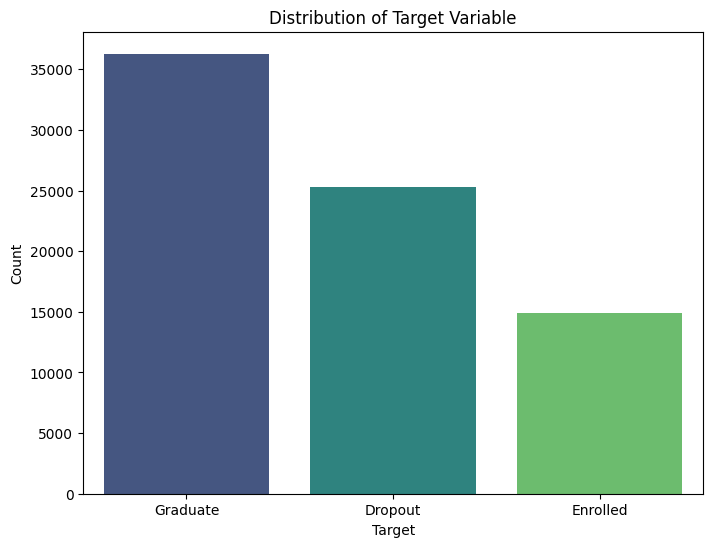

In [12]:
plt.figure(figsize=(8, 6))
sns.countplot(data=train, x='Target', palette='viridis')
plt.title('Distribution of Target Variable')
plt.xlabel('Target')
plt.ylabel('Count')
plt.show()

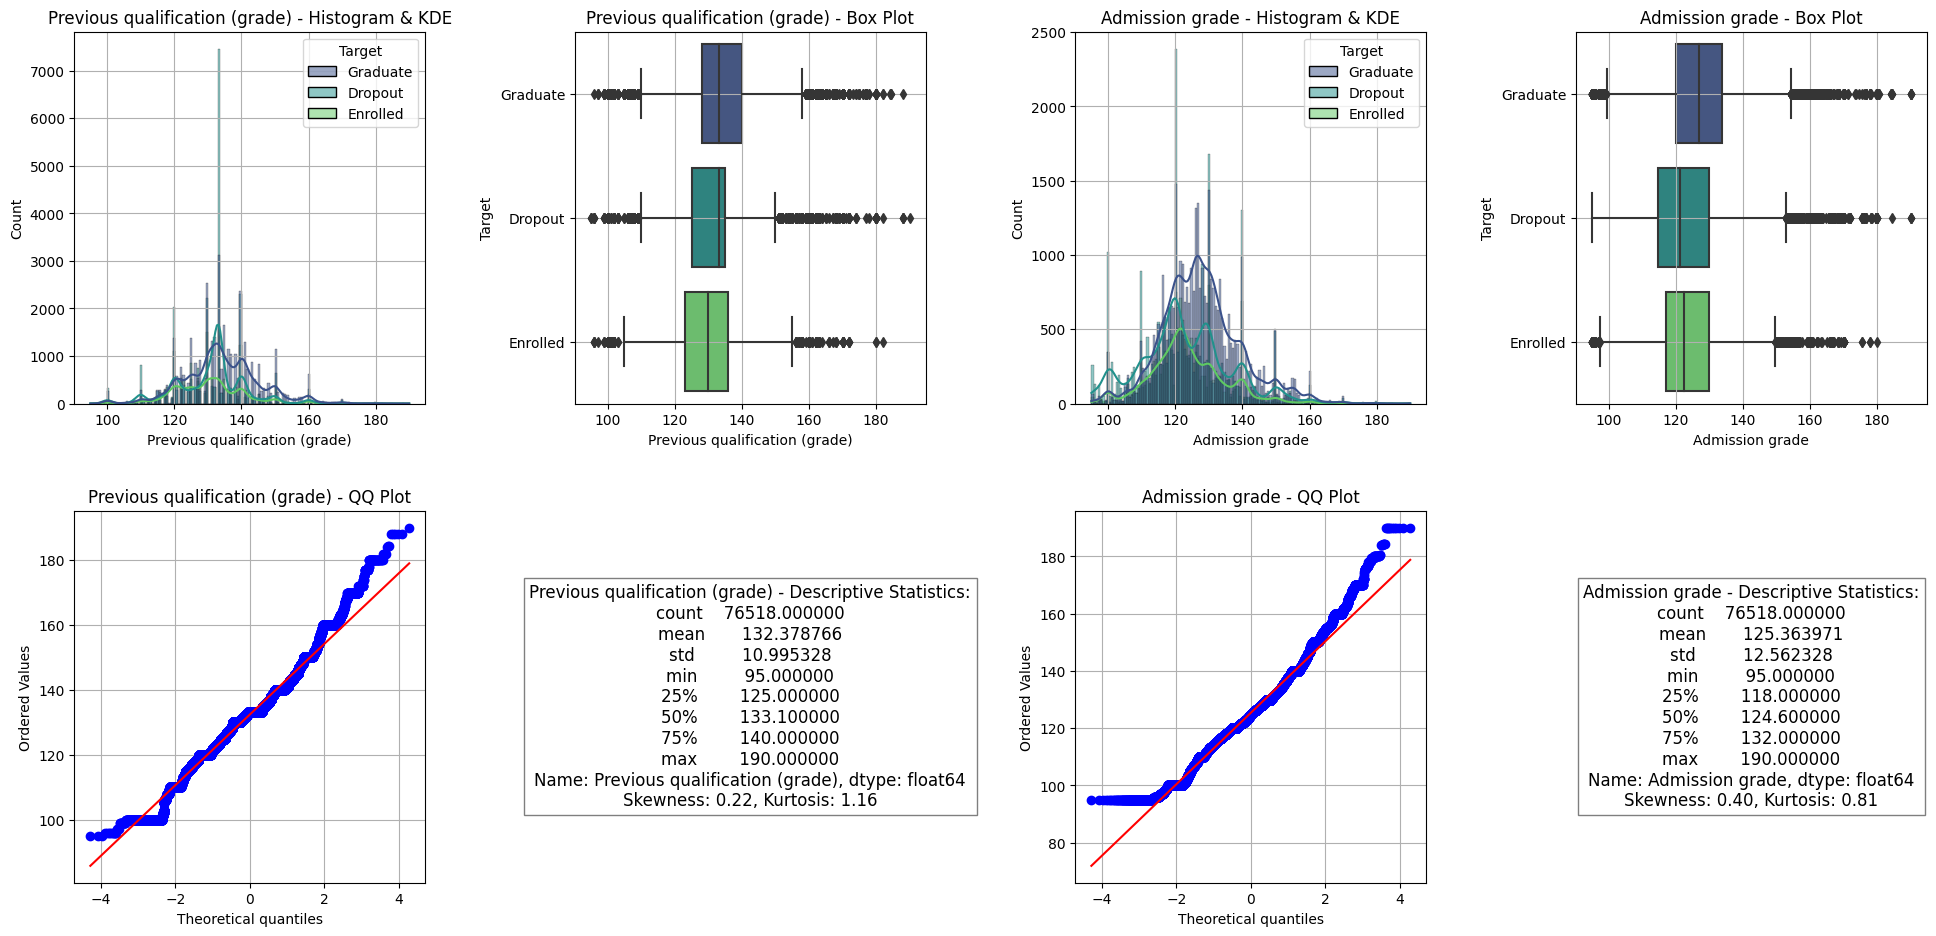

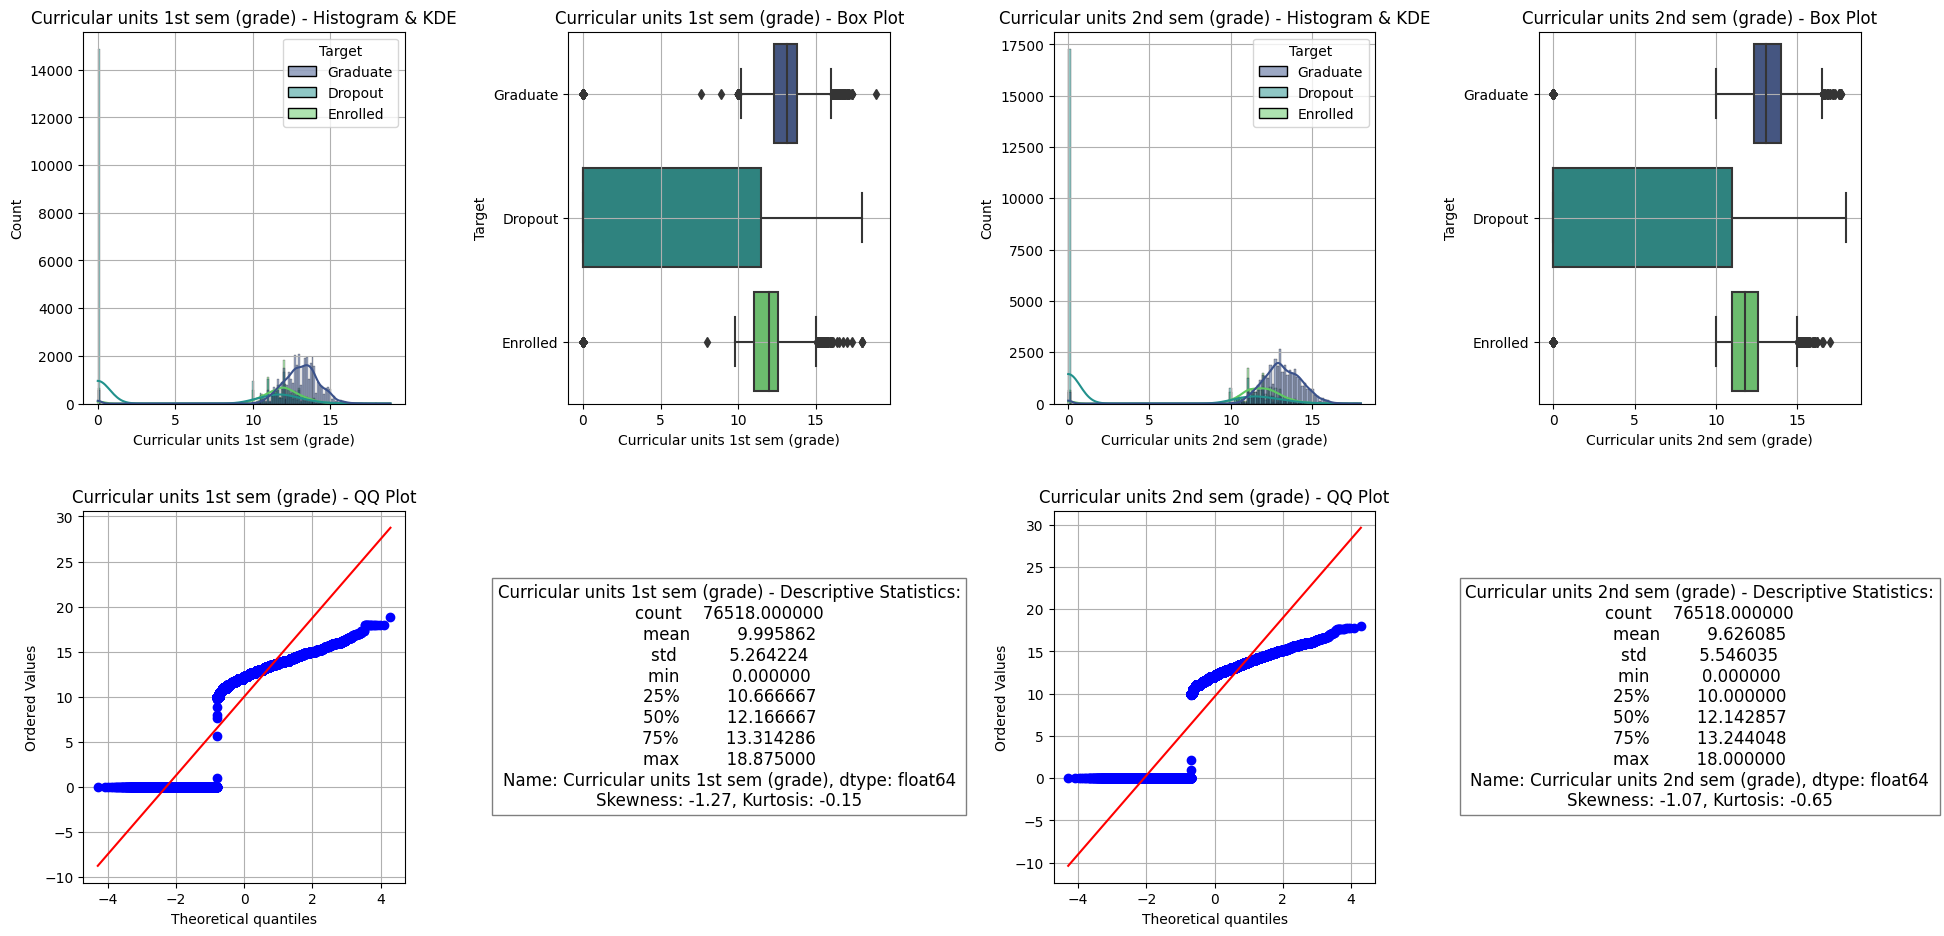

In [13]:
import warnings
def plot_continuous_distribution(df, features, target):
    num_features = len(features)

    for i in range(0, num_features, 2):
        fig, axes = plt.subplots(2, 4, figsize=(20, 10))

        for j in range(2):
            if i + j < num_features:
                feature = features[i + j]

                with warnings.catch_warnings():
                    warnings.simplefilter(action='ignore', category=FutureWarning)

                    sns.histplot(df, x=feature, hue=target, kde=True, ax=axes[0, j*2], palette='viridis')
                    axes[0, j*2].set_title(f'{feature} - Histogram & KDE')
                    axes[0, j*2].grid(True)

                    sns.boxplot(x=feature, y=target, data=df, ax=axes[0, j*2+1], palette='viridis')
                    axes[0, j*2+1].set_title(f'{feature} - Box Plot')
                    axes[0, j*2+1].grid(True)

                stats.probplot(df[feature], dist="norm", plot=axes[1, j*2])
                axes[1, j*2].get_lines()[1].set_color('red')
                axes[1, j*2].set_title(f'{feature} - QQ Plot')
                axes[1, j*2].grid(True)

                desc_stats = df[feature].describe()
                skewness = df[feature].skew()
                kurtosis = df[feature].kurt()
                stats_text = (f'{feature} - Descriptive Statistics:\n{desc_stats}\n'
                              f'Skewness: {skewness:.2f}, Kurtosis: {kurtosis:.2f}')
                axes[1, j*2+1].text(0.5, 0.5, stats_text, ha='center', va='center', fontsize=12,
                                    transform=axes[1, j*2+1].transAxes, bbox=dict(facecolor='white', alpha=0.5))
                axes[1, j*2+1].axis('off')
            else:
                for k in range(2):
                    axes[0, j*2+k].axis('off')
                    axes[1, j*2+k].axis('off')

        plt.tight_layout(pad=3.0)
        plt.show()

plot_continuous_distribution(train, continuous_features, 'Target')

/tmp/ipykernel_18/192002181.py:18: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  handles = pairplot._legend.legendHandles


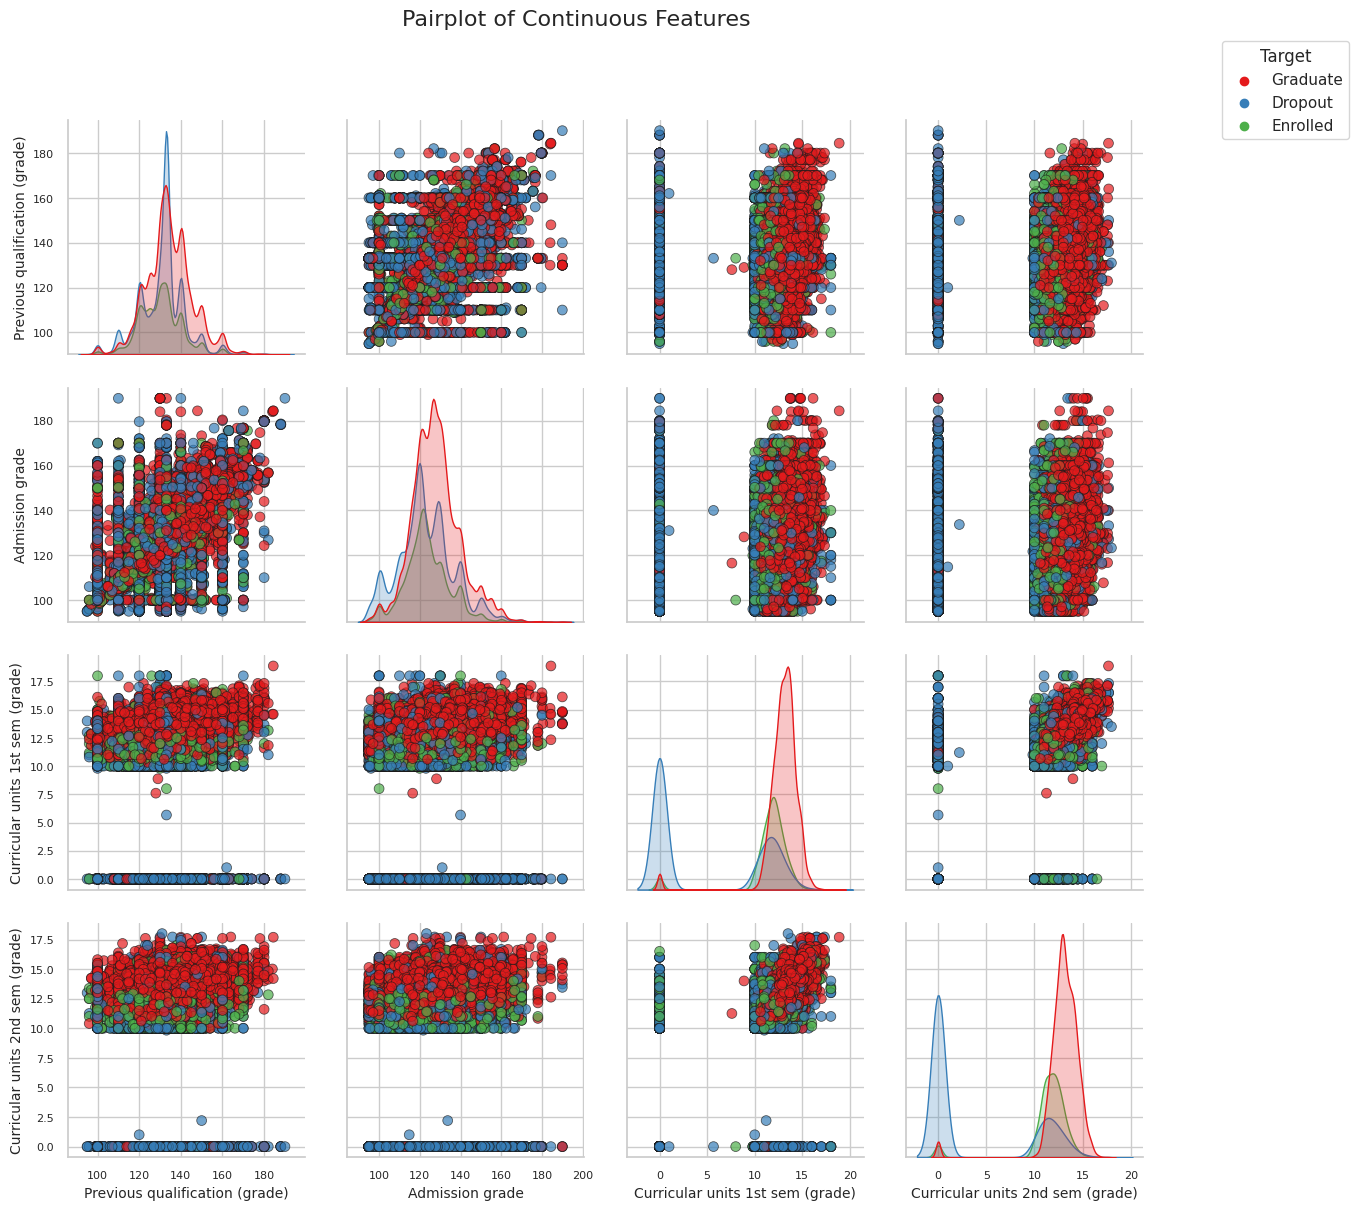

In [14]:
def pairplot(df, features, target):
    sns.set(style="whitegrid", palette="muted")

    with warnings.catch_warnings():
        warnings.filterwarnings("ignore", category=FutureWarning)
        pairplot = sns.pairplot(df, vars=features, hue=target,
                                diag_kind='kde',
                                plot_kws={'alpha': 0.7, 's': 50, 'edgecolor': 'k'},
                                diag_kws={'fill': True},
                                palette='Set1')

    pairplot.fig.suptitle('Pairplot of Continuous Features', fontsize=16, y=1.02)
    for ax in pairplot.axes.flatten():
        ax.set_xlabel(ax.get_xlabel(), fontsize=10)
        ax.set_ylabel(ax.get_ylabel(), fontsize=10)
        ax.tick_params(axis='both', which='major', labelsize=8)

    handles = pairplot._legend.legendHandles
    labels = list(pairplot._legend.texts)
    pairplot._legend.remove()
    pairplot.fig.legend(handles=handles, labels=[label.get_text() for label in labels], title=target, loc='upper right', bbox_to_anchor=(1.15, 1))

    pairplot.fig.set_size_inches(12, 12)
    pairplot.fig.subplots_adjust(top=0.9)
    pairplot.fig.tight_layout(pad=2.0)
    plt.show()

pairplot(train, continuous_features, "Target")

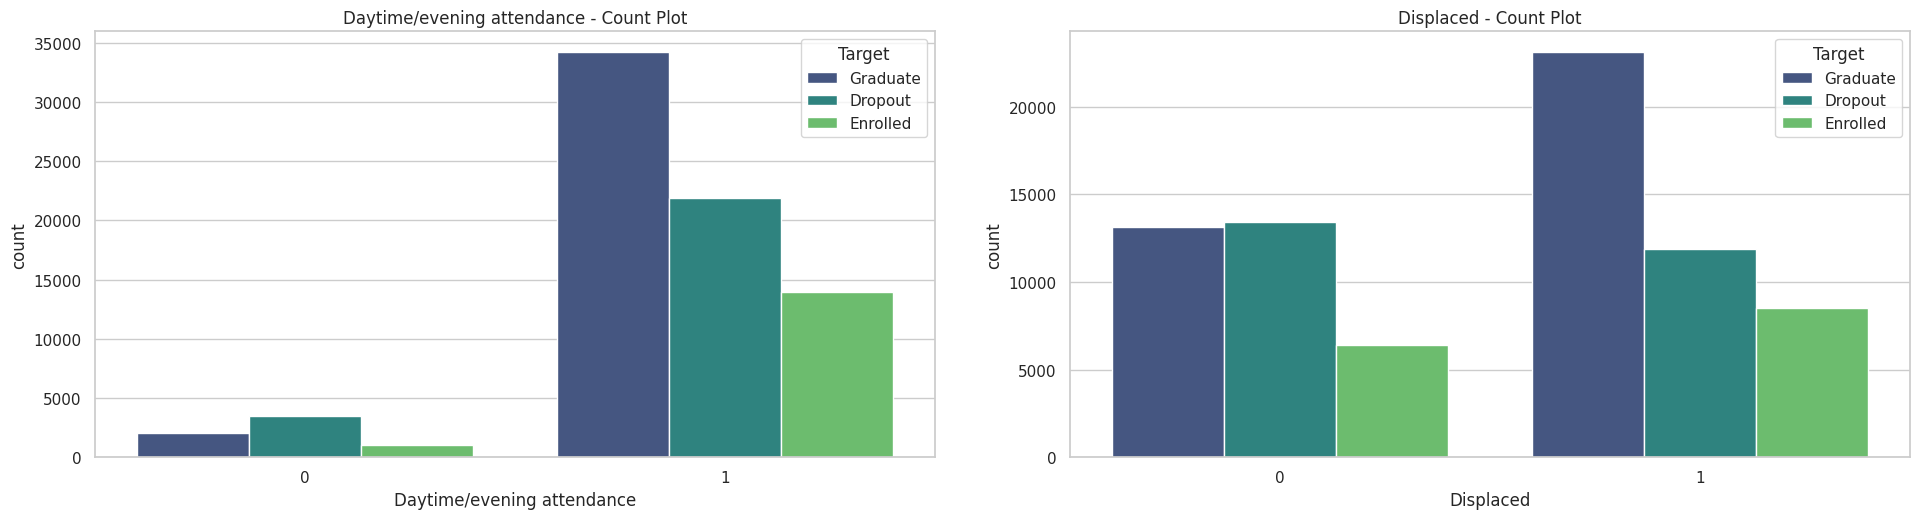

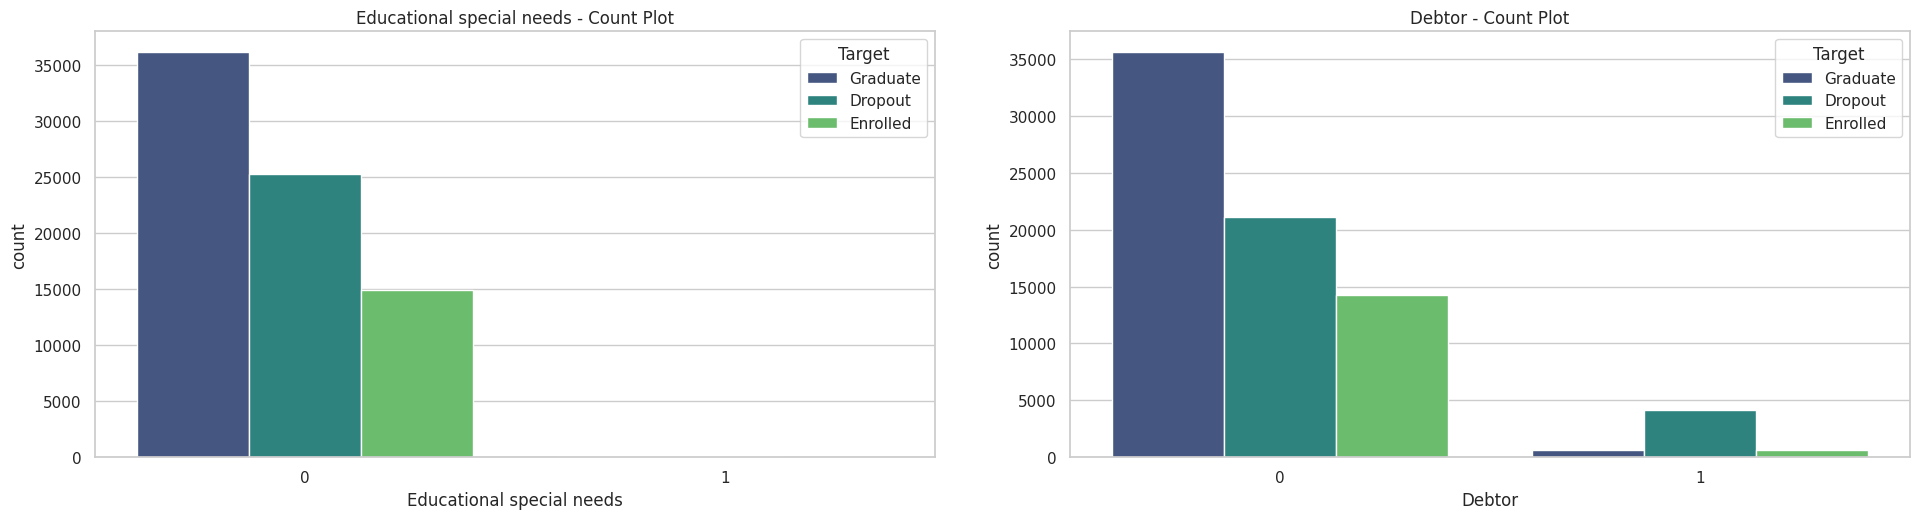

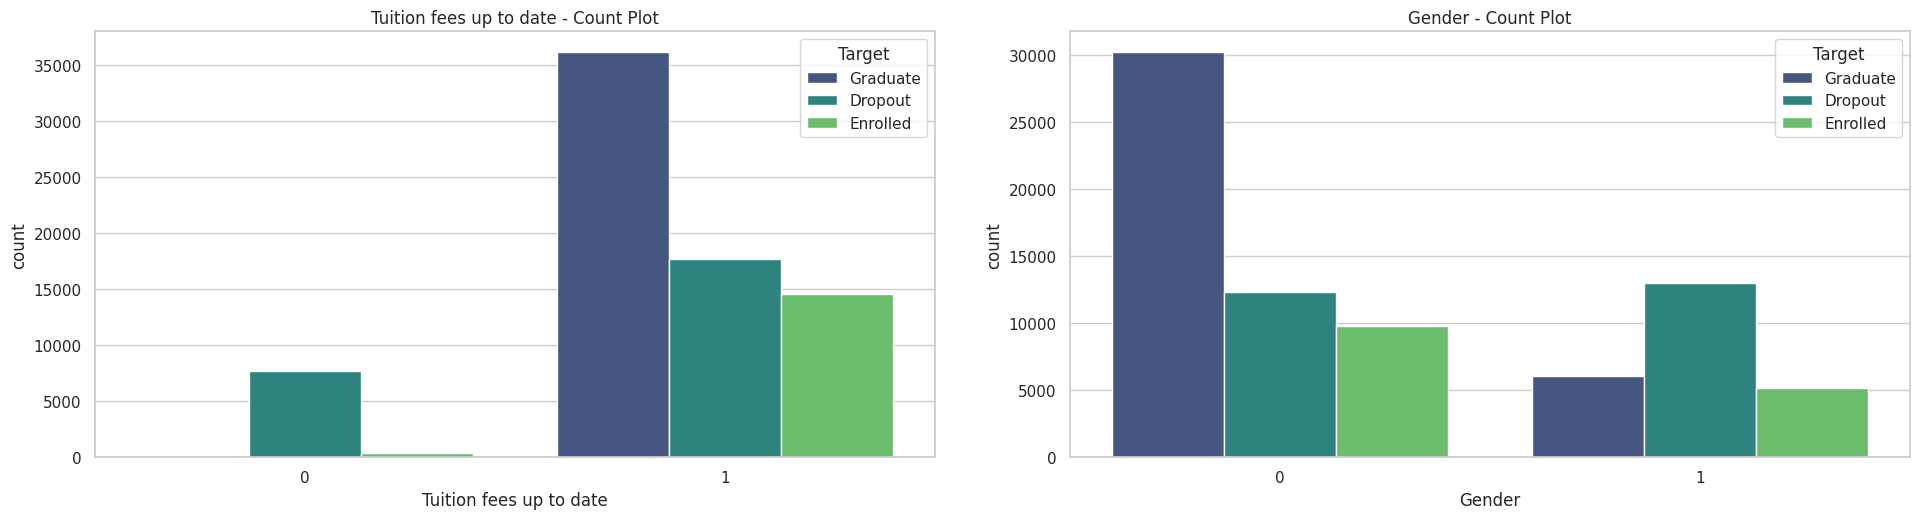

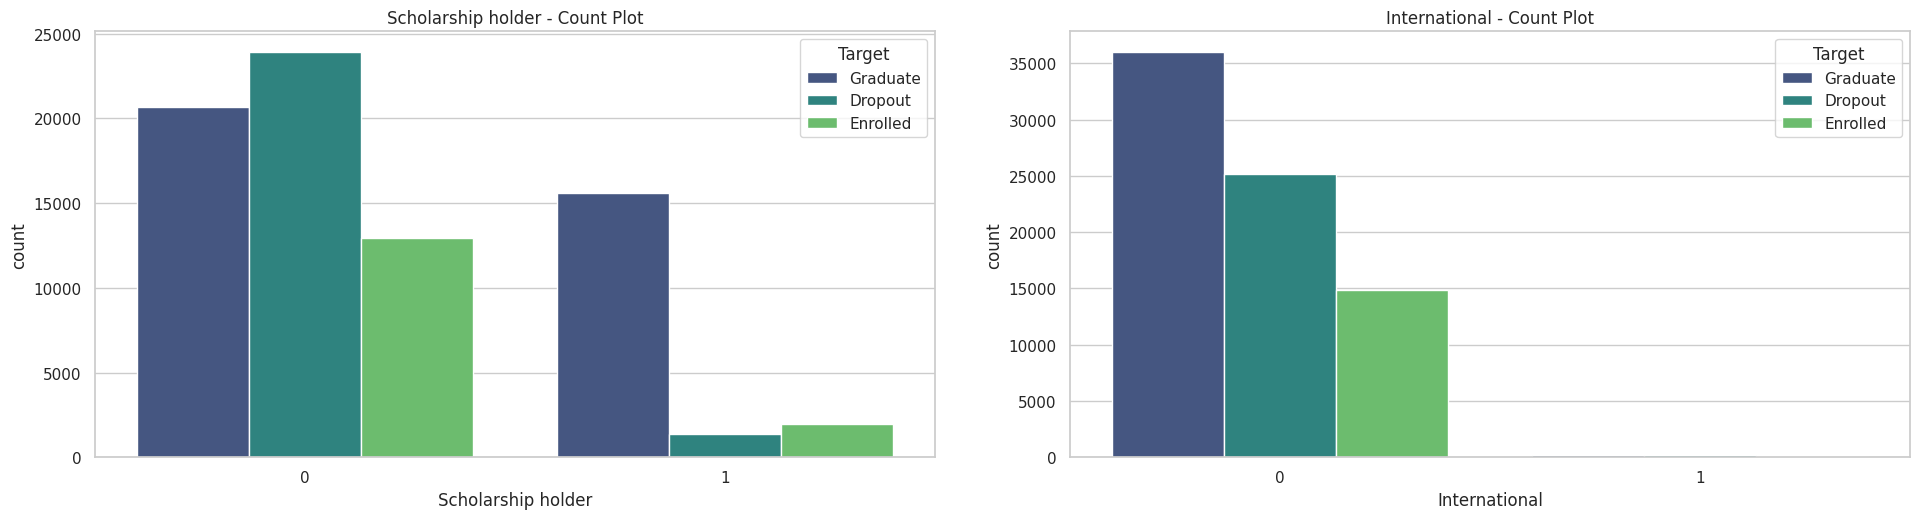

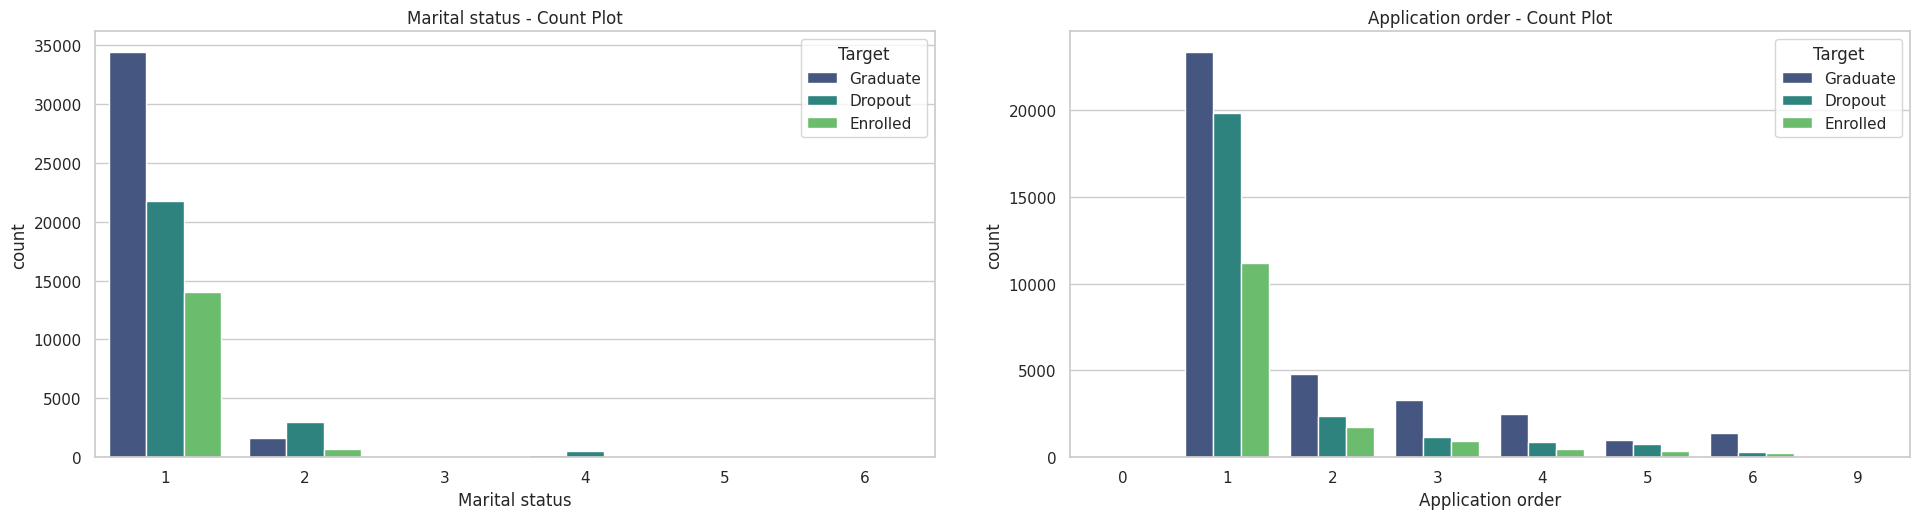

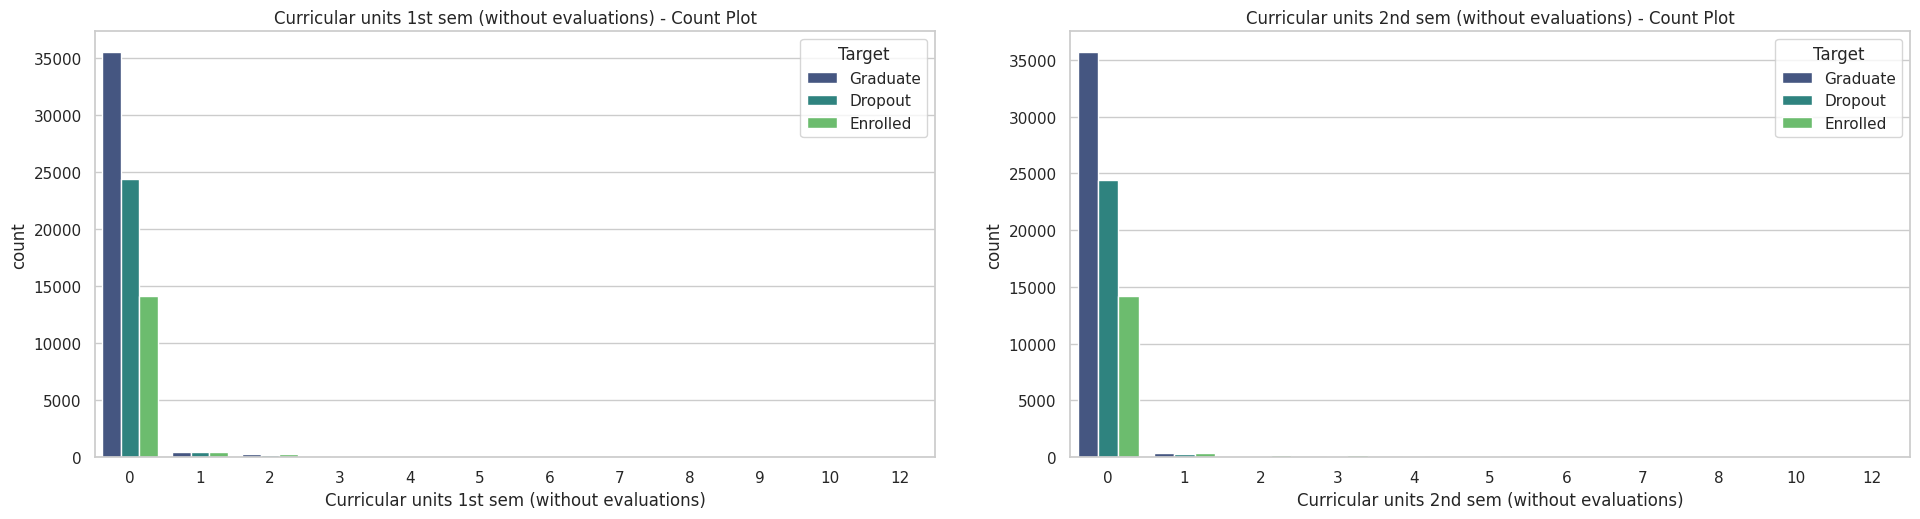

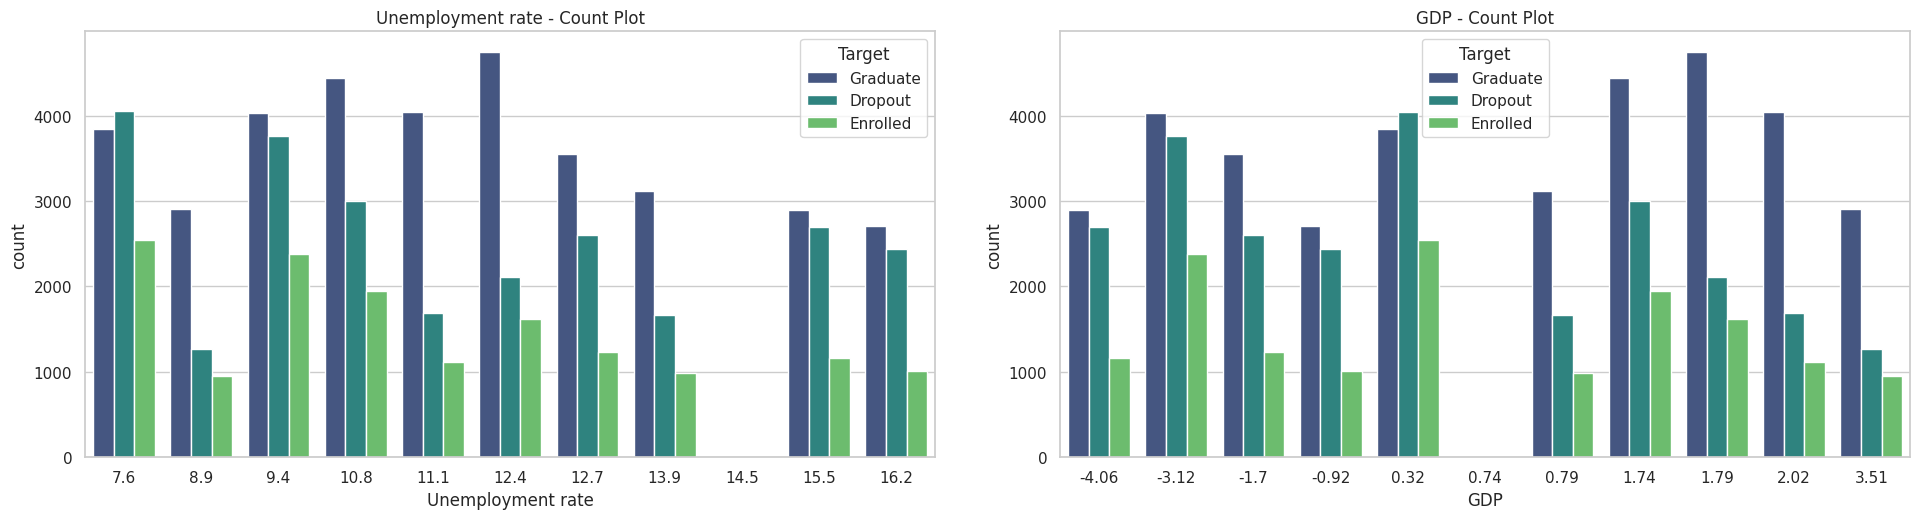

In [15]:
def plot_categorical_distribution(df, features, target):
    num_features = len(features)
    
    for i in range(0, num_features, 2):
        fig, axes = plt.subplots(1, 2, figsize=(20, 6))
        
        for j in range(2):
            if i + j < num_features:
                feature = features[i + j]

                sns.countplot(x=df[feature], hue=target, data=df, palette='viridis', ax=axes[j])
                axes[j].set_title(f'{feature} - Count Plot')
                axes[j].grid(True, axis='y')
            else:
                axes[j].axis('off')

        plt.tight_layout(pad=3.0)
        plt.show()
        
    
plot_categorical_distribution(train, binary_features, "Target")
plot_categorical_distribution(train, categorical_features, "Target")

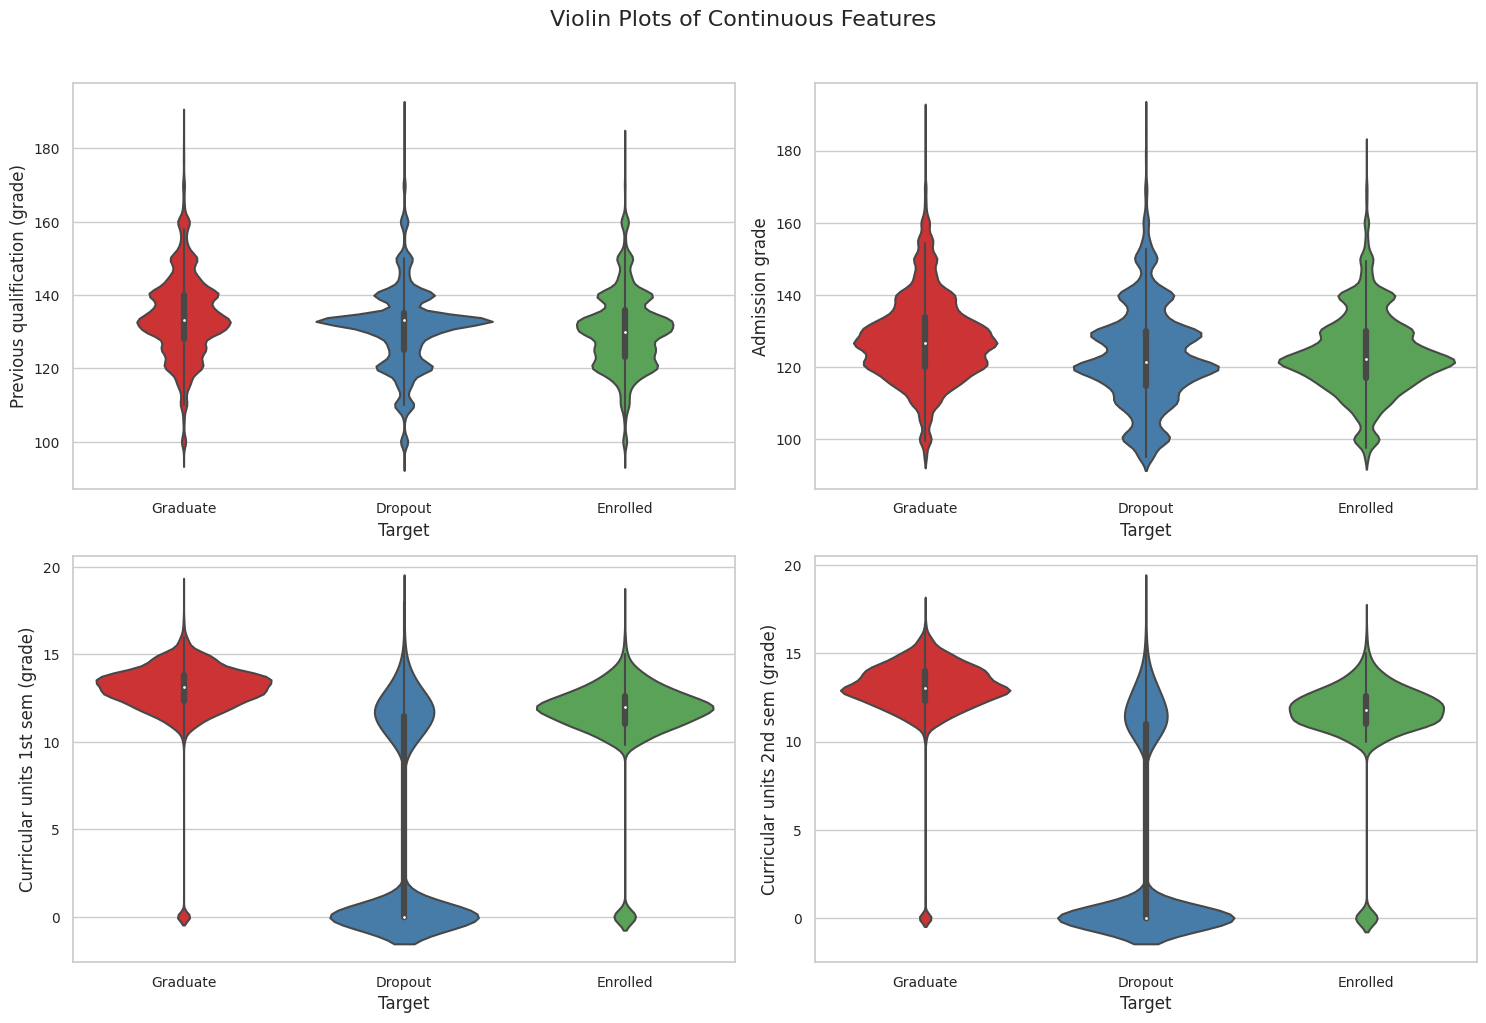

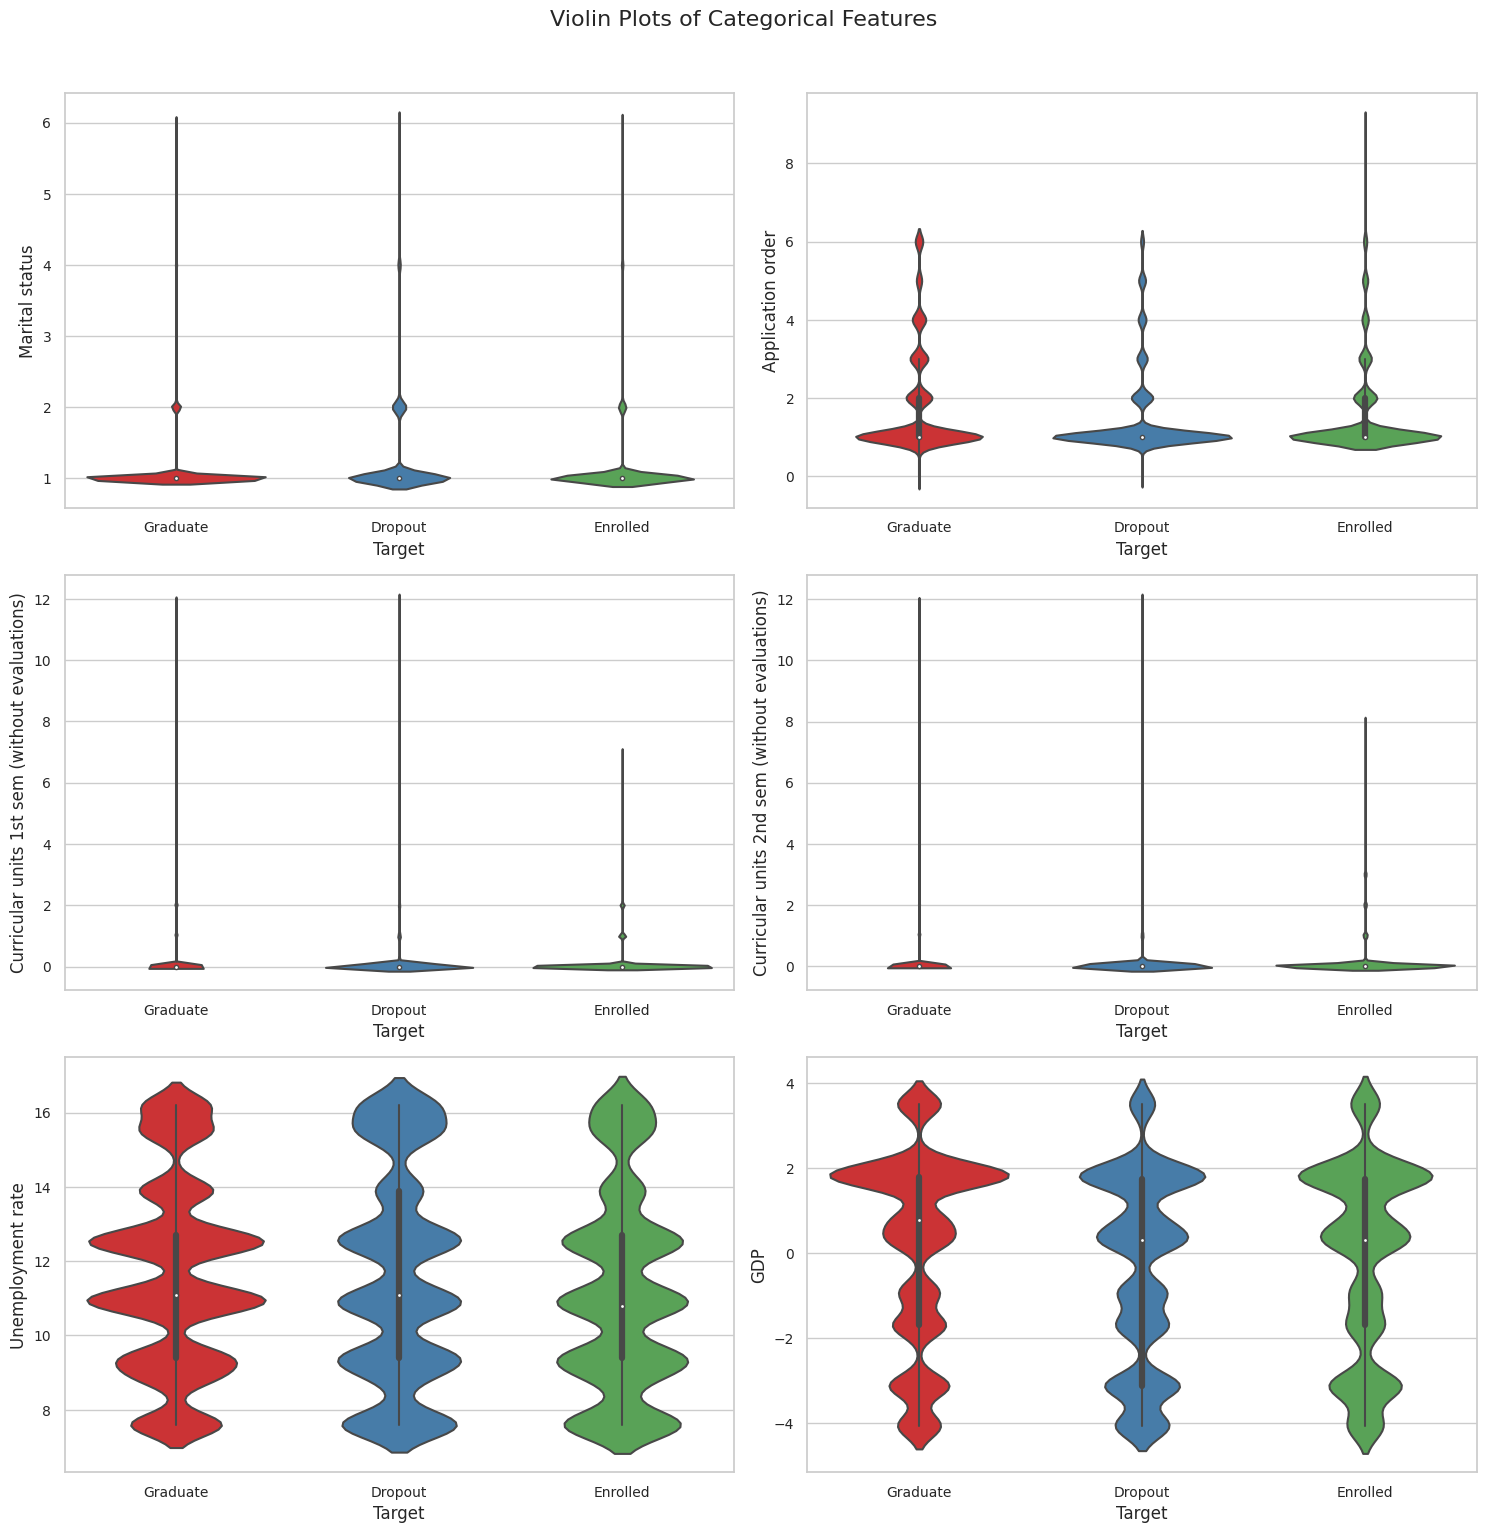

In [16]:
def violin_plots(df, continuous_features, categorical_features, target):
    sns.set(style="whitegrid", palette="muted")
    
    def create_violin_grid(features, title):
        plots_per_row = 2
        num_features = len(features)
        num_rows = (num_features + plots_per_row - 1) // plots_per_row
        fig, axes = plt.subplots(nrows=num_rows, ncols=plots_per_row, figsize=(15, 5 * num_rows))
        axes = axes.flatten()
        for i, feature in enumerate(features):
            sns.violinplot(x=target, y=feature, data=df, ax=axes[i], palette='Set1')
            axes[i].set_xlabel(target, fontsize=12)
            axes[i].set_ylabel(feature, fontsize=12)
            axes[i].tick_params(axis='both', which='major', labelsize=10)
        for j in range(i + 1, len(axes)):
            fig.delaxes(axes[j])
        fig.suptitle(title, fontsize=16, y=1.02)
        fig.tight_layout(pad=1.0)
        plt.show()

    create_violin_grid(continuous_features, 'Violin Plots of Continuous Features')
    create_violin_grid(categorical_features, 'Violin Plots of Categorical Features')

violin_plots(train, continuous_features, categorical_features, "Target")

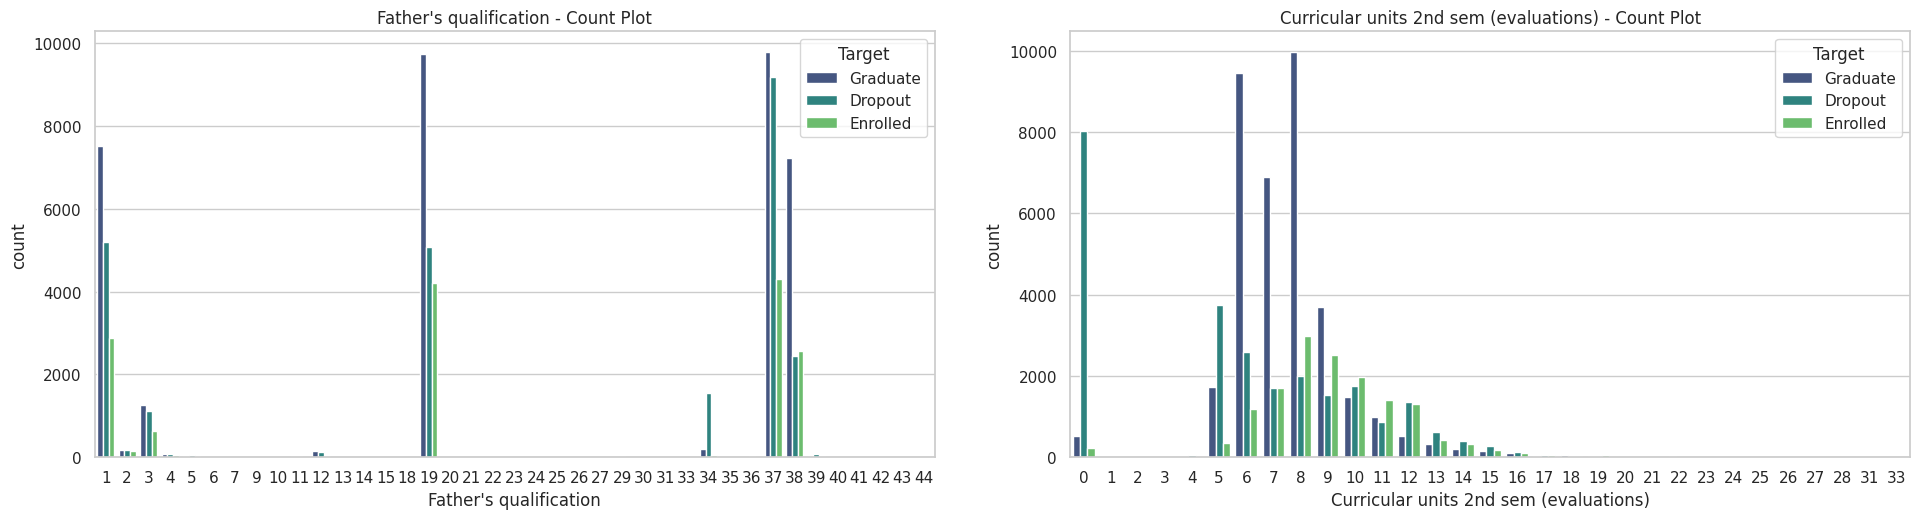

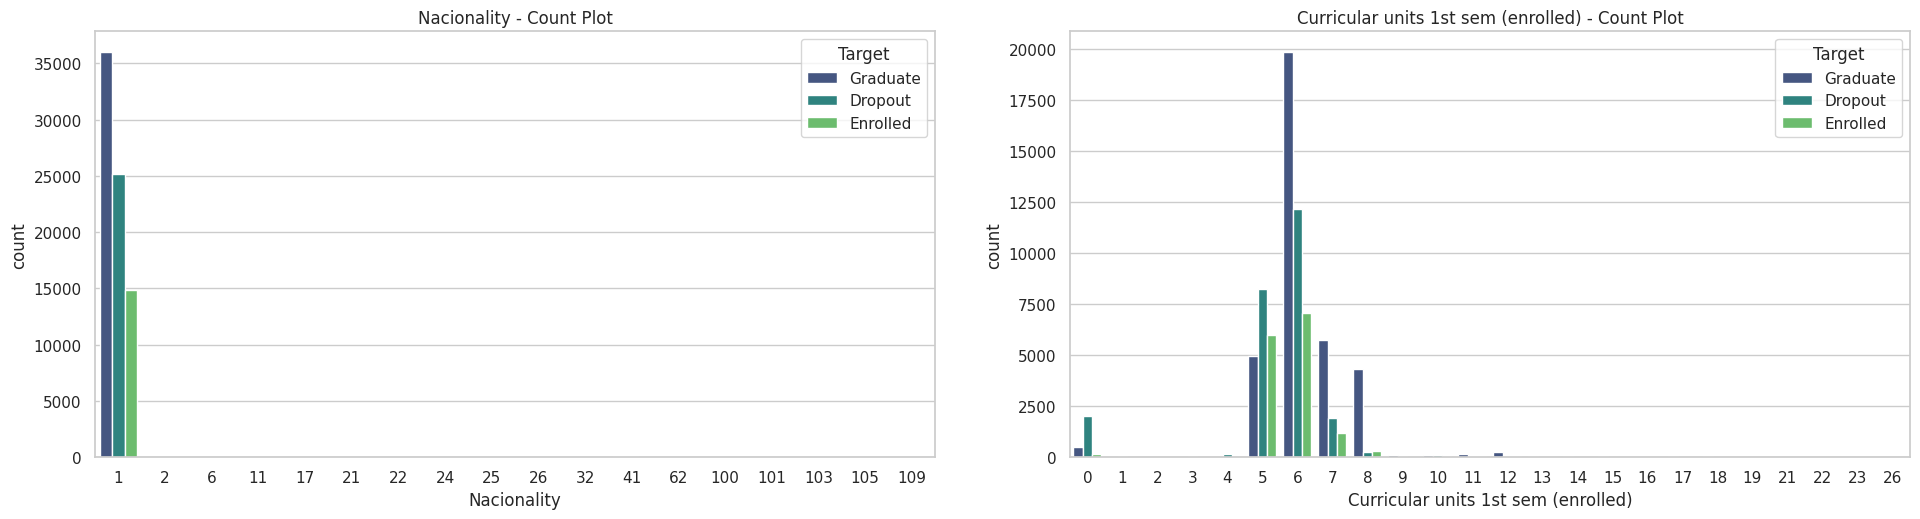

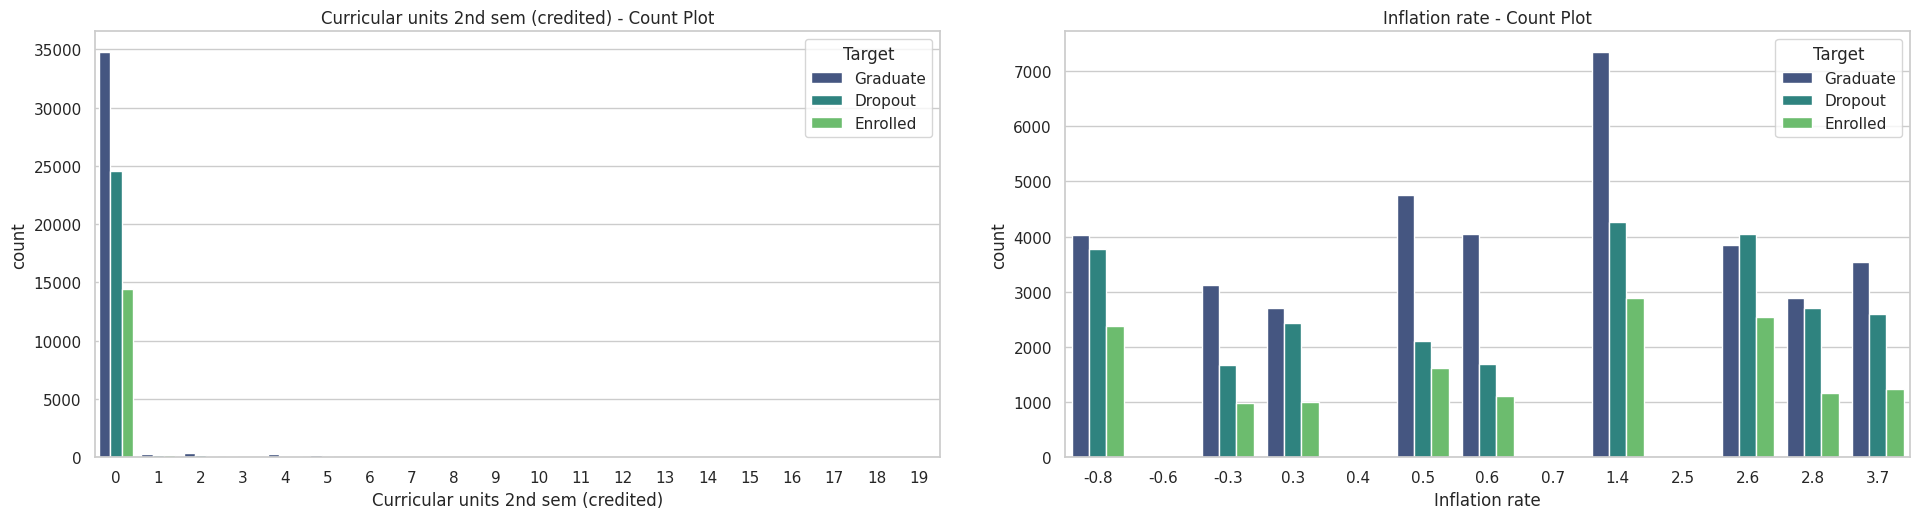

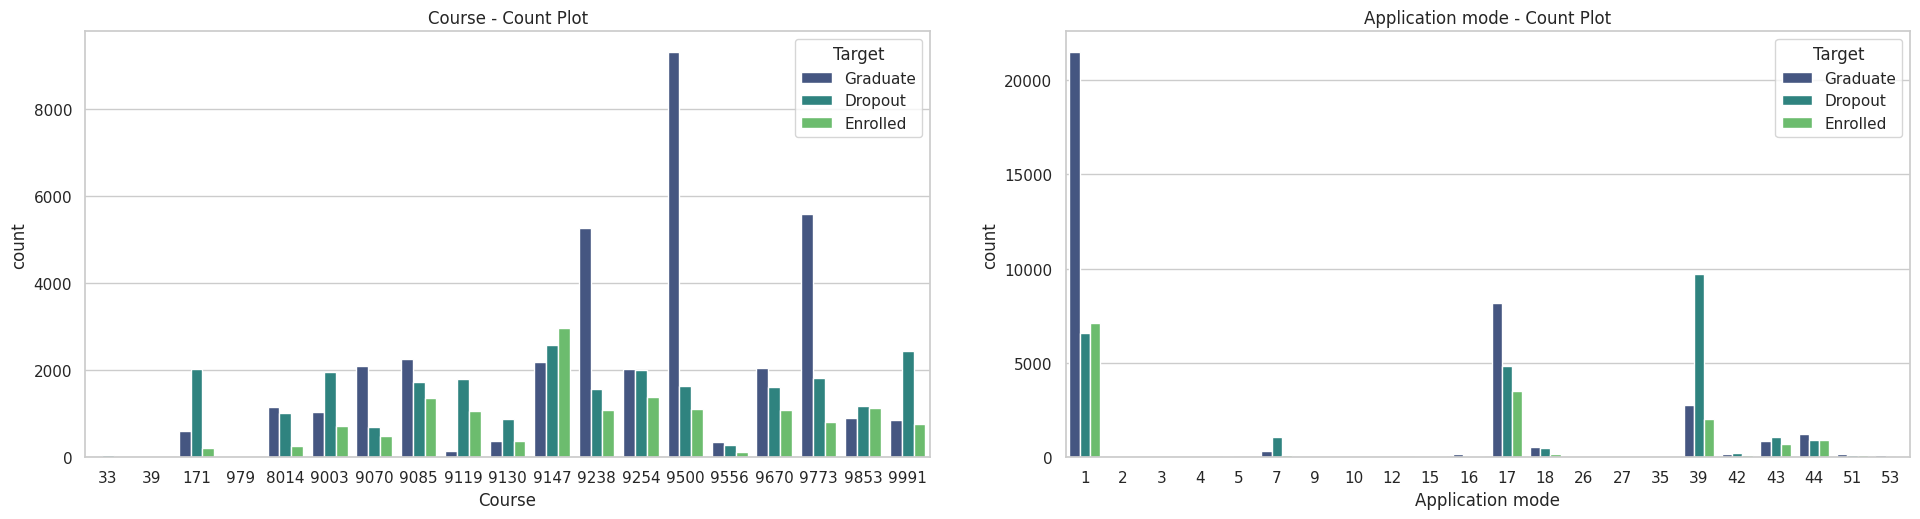

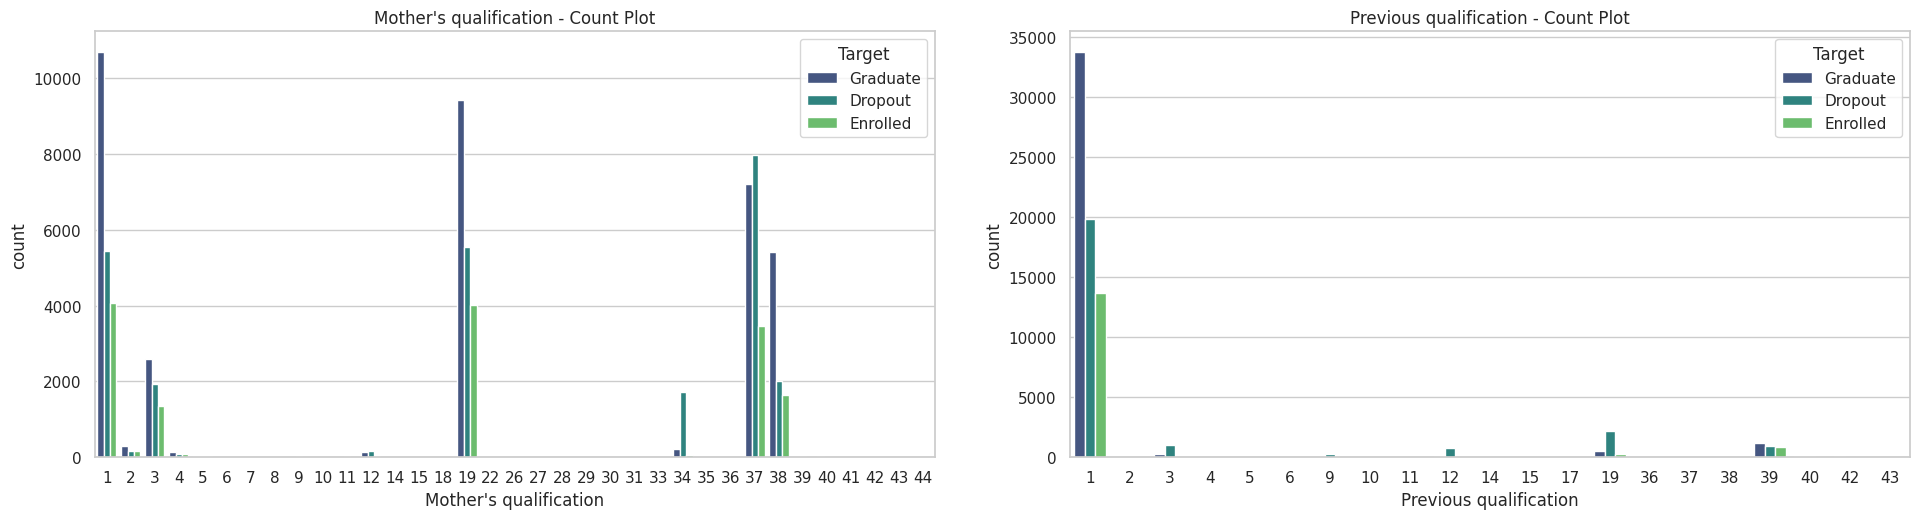

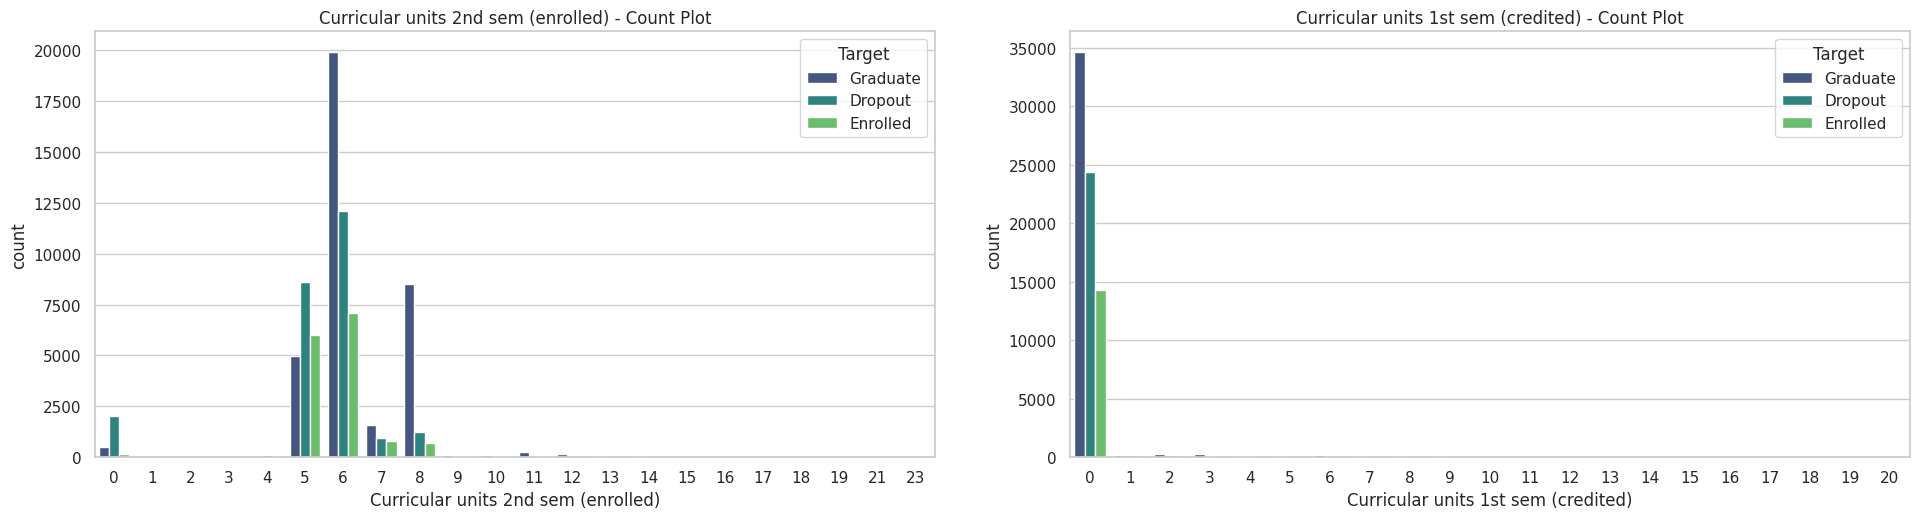

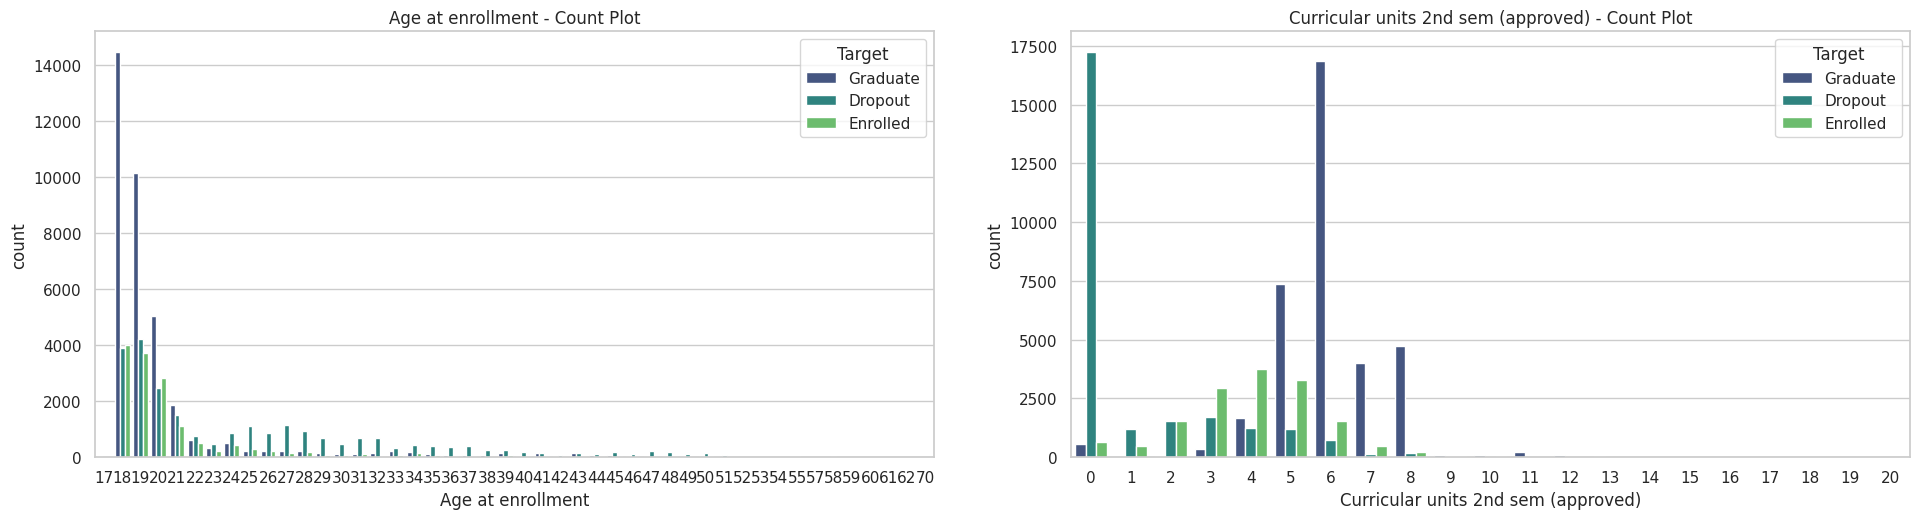

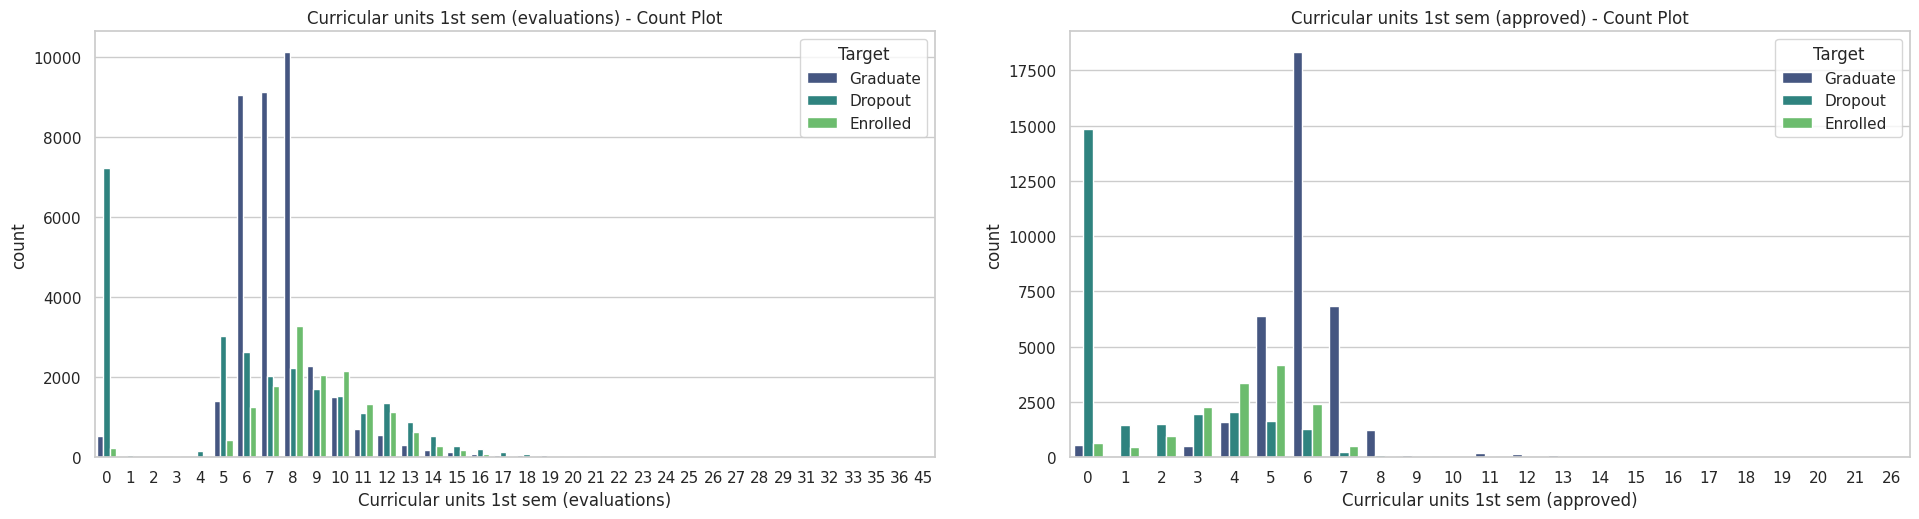

In [17]:
def plot_long_categorical_distribution(df, features, target):
    num_features = len(features)
    
    for i in range(0, num_features, 2):
        fig, axes = plt.subplots(1, 2, figsize=(20, 6))
        
        for j in range(2):
            if i + j < num_features:
                feature = features[i + j]
                sns.countplot(x=df[feature], hue=target, data=df, palette='viridis', ax=axes[j])
                axes[j].set_title(f'{feature} - Count Plot')
                axes[j].grid(True, axis='y')
            else:
                axes[j].axis('off')

        plt.tight_layout(pad=3.0)
        plt.show()

longer_cats = ["Father's occupation", "Mother's occupation"]
long_categorical_features = list(set(long_categorical_features) - set(longer_cats))
plot_long_categorical_distribution(train, long_categorical_features, 'Target')

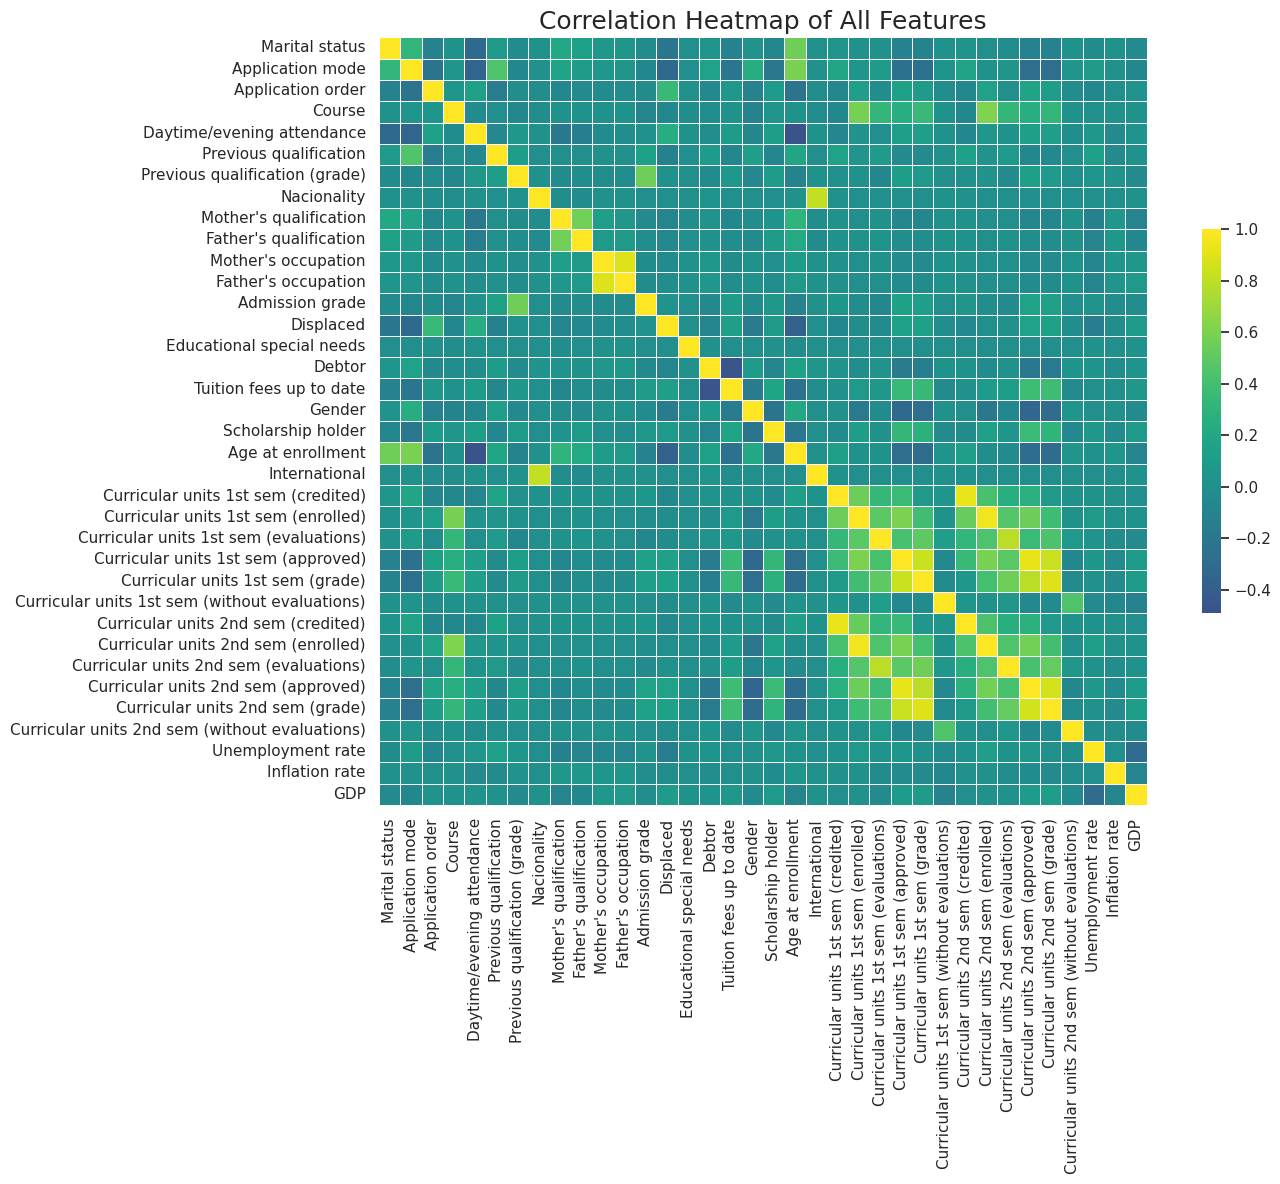

In [18]:
corr_matrix = X.corr()
fig, ax = plt.subplots(figsize=(15, 12))
sns.heatmap(corr_matrix, annot=False, cmap='viridis', center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)
ax.set_title('Correlation Heatmap of All Features', fontsize=18)
fig.tight_layout()

plt.show()

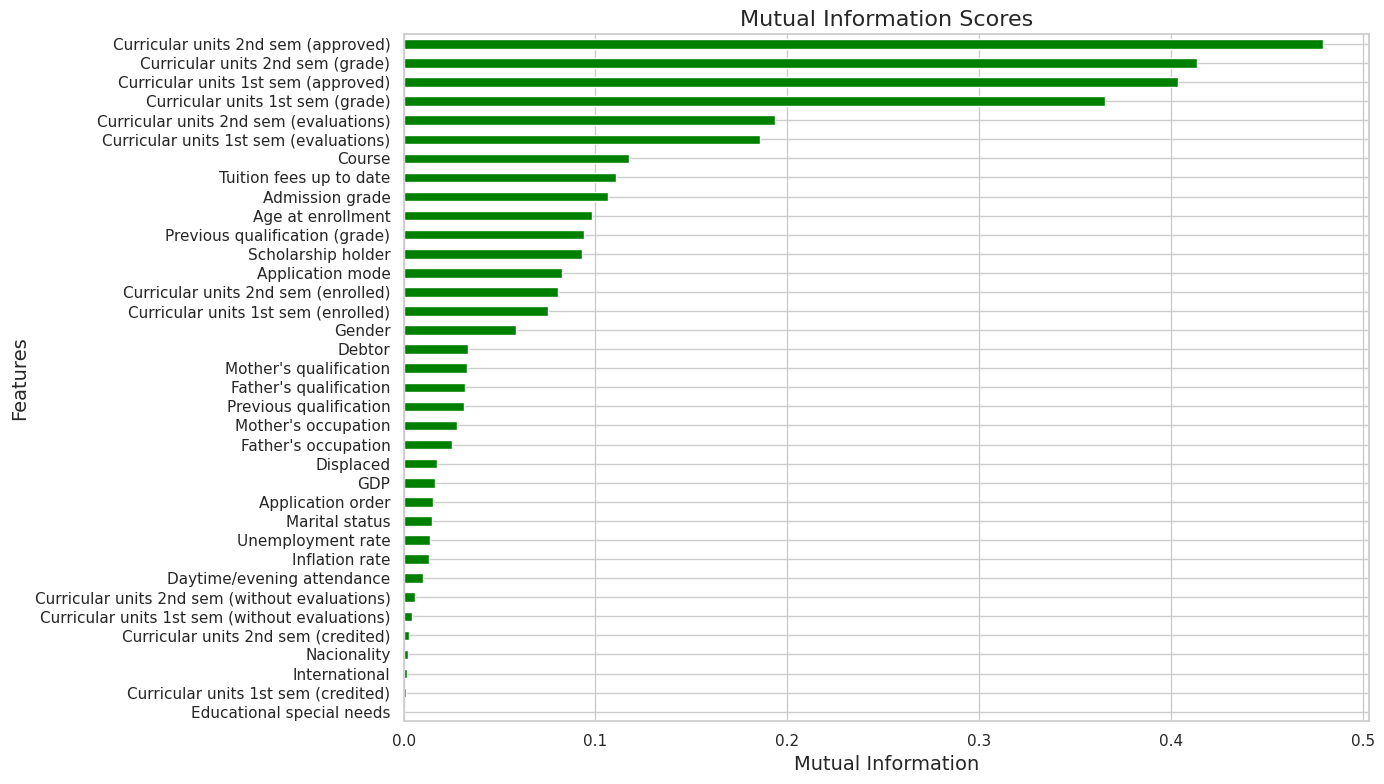

In [19]:
def mutual_info_classifier(X, y, n_features):

    mi = mutual_info_classif(X, y, discrete_features='auto')
    mi = pd.Series(mi, index=X.columns)
    mi = mi.sort_values(ascending=False)
    
    return mi.head(n_features)

def plot_mutual_info(mi_scores):
    plt.figure(figsize=(14, 8))
    ax = mi_scores.sort_values(ascending=True).plot(kind='barh', color='green')
    ax.set_title('Mutual Information Scores', fontsize=16)
    ax.set_xlabel('Mutual Information', fontsize=14)
    ax.set_ylabel('Features', fontsize=14)
    ax.xaxis.grid(True)
    plt.tight_layout()
    plt.show()

mi_scores = mutual_info_classifier(X, y, 36)
plot_mutual_info(mi_scores)

In [20]:
scaler = RobustScaler()
X[continuous_features] = scaler.fit_transform(X[continuous_features])

## **OPTIONAL - (OUTLIER REMOVAL)**

In [21]:
# iso_forest = IsolationForest(contamination=0.01,random_state=42)
# outliers = iso_forest.fit_predict(X)

# outliers = pd.Series(outliers, index=train.index)
# train_cleaned = train[outliers == 1]
# X_cleaned = train_cleaned.drop(columns=["Target"])
# y_cleaned = train_cleaned["Target"]

<h3 style="text-align: center; font-size: 24px; color: #FFFFFF; text-shadow: 2px 2px 5px #000000; background: rgba(0, 0, 0, 1); padding: 10px 20px; border-radius: 15px; box-shadow: 0px 0px 15px rgba(0, 0, 0, 0.5); display: inline-block; margin: 0 auto;">
    MODEL VALIDATION
</h3>
<div style="position: relative; z-index: -1; text-align: center;">
    <div style="display: inline-block; position: relative; width: 80%; height: 100%; overflow: hidden;">
        <div style="position: absolute; width: 200%; height: 200%; background: repeating-linear-gradient(135deg, #00FF00, #00FF00 10px, #000000 10px, #000000 20px); opacity: 0.7;"></div>
    </div>
</div>


## **High performance models taken for optuna by cross validation**

In [22]:
# models = {
#     "RandomForest": RandomForestClassifier(),
#     "AdaBoost": AdaBoostClassifier(),
#     "GradientBoosting": GradientBoostingClassifier(),
#     "ExtraTrees": ExtraTreesClassifier(),
#     "LightGBM": LGBMClassifier(),
#     "CatBoost": CatBoostClassifier(verbose=0),
# }

# # KFold cross-validation
# kf = KFold(n_splits=3, shuffle=True, random_state=1)

# # Dictionary to store results
# results = {}

# # Evaluate each model
# for name, model in models.items():
#     cv_results = cross_val_score(model, X, y, cv=kf, scoring='accuracy',n_jobs=-1)
#     results[name] = cv_results
#     print(f"{name} - Accuracy: {cv_results.mean():.4f} (+/- {cv_results.std():.4f})")

# # Display summary of results
# results_df = pd.DataFrame(results).T
# results_df.columns = ['Fold 1', 'Fold 2', 'Fold 3']
# results_df['Mean Accuracy'] = results_df.mean(axis=1)
# results_df['Std Dev'] = results_df.std(axis=1)

# print("\nSummary of results:")
# print(results_df)

## **OPTUNA**

In [23]:
def objective_random_forest(trial):
    param = {
        'n_estimators': trial.suggest_int('n_estimators', 50, 500),
        'max_depth': trial.suggest_int('max_depth', 2, 32),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 14),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 14),
        'max_features': trial.suggest_categorical('max_features', ['auto', 'sqrt', 'log2'])
    }
    model = RandomForestClassifier(**param)
    kf = KFold(n_splits=3, shuffle=True, random_state=1)
    return cross_val_score(model, X, y, cv=kf, scoring='accuracy', n_jobs=-1).mean()

def objective_gradient_boosting(trial):
    param = {
        'n_estimators': trial.suggest_int('n_estimators', 50, 500),
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
        'max_depth': trial.suggest_int('max_depth', 2, 32),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 14),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 14),
        'max_features': trial.suggest_categorical('max_features', [1.0, 'sqrt', 'log2'])
    }
    model = GradientBoostingClassifier(**param)
    kf = KFold(n_splits=3, shuffle=True, random_state=1)
    return cross_val_score(model, X, y, cv=kf, scoring='accuracy', n_jobs=-1).mean()

def objective_ada_boost(trial):
    param = {
        'n_estimators': trial.suggest_int('n_estimators', 50, 500),
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 1.0)
    }
    model = AdaBoostClassifier(**param)
    kf = KFold(n_splits=3, shuffle=True, random_state=1)
    return cross_val_score(model, X, y, cv=kf, scoring='accuracy', n_jobs=-1).mean()

def objective_extra_trees(trial):
    param = {
        'n_estimators': trial.suggest_int('n_estimators', 50, 500),
        'max_depth': trial.suggest_int('max_depth', 2, 32),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 14),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 14),
        'max_features': trial.suggest_categorical('max_features', [1.0, 'sqrt', 'log2'])
    }
    model = ExtraTreesClassifier(**param)
    kf = KFold(n_splits=3, shuffle=True, random_state=1)
    return cross_val_score(model, X, y, cv=kf, scoring='accuracy', n_jobs=-1).mean()

def objective_lgbm(trial):
    param = {
        'n_estimators': trial.suggest_int('n_estimators', 50, 500),
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 1.0),
        'num_leaves': trial.suggest_int('num_leaves', 31, 256),
        'max_depth': trial.suggest_int('max_depth', -1, 32),
        'min_child_samples': trial.suggest_int('min_child_samples', 5, 100),
        'subsample': trial.suggest_uniform('subsample', 0.4, 1.0),
        'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.4, 1.0),
        'reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-8, 10.0),
        'reg_lambda': trial.suggest_loguniform('reg_lambda', 1e-8, 10.0)
    }
    model = LGBMClassifier(**param)
    kf = KFold(n_splits=3, shuffle=True, random_state=1)
    return cross_val_score(model, X, y, cv=kf, scoring='accuracy', n_jobs=-1).mean()

def objective_catboost(trial):
    param = {
        'iterations': trial.suggest_int('iterations', 50, 500),
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 1.0),
        'depth': trial.suggest_int('depth', 1, 16),
        'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1e-8, 10.0),
        'border_count': trial.suggest_int('border_count', 1, 255)
    }
    model = CatBoostClassifier(**param, silent=True)
    kf = KFold(n_splits=3, shuffle=True, random_state=1)
    return cross_val_score(model, X, y, cv=kf, scoring='accuracy', n_jobs=-1).mean()

# Define study and optimize for each model
# study_rf = optuna.create_study(direction='maximize')
# study_rf.optimize(objective_random_forest, n_trials=50, n_jobs=-1)
# print(f"Random Forest Best Params: {study_rf.best_params}, Best Score: {study_rf.best_value}")

# study_gb = optuna.create_study(direction='maximize')
# study_gb.optimize(objective_gradient_boosting, n_trials=50, n_jobs=-1)
# print(f"Gradient Boosting Best Params: {study_gb.best_params}, Best Score: {study_gb.best_value}")

# study_ab = optuna.create_study(direction='maximize')
# study_ab.optimize(objective_ada_boost, n_trials=50, n_jobs=-1)
# print(f"AdaBoost Best Params: {study_ab.best_params}, Best Score: {study_ab.best_value}")

# study_et = optuna.create_study(direction='maximize')
# study_et.optimize(objective_extra_trees, n_trials=50, n_jobs=-1)
# print(f"Extra Trees Best Params: {study_et.best_params}, Best Score: {study_et.best_value}")

# study_lgbm = optuna.create_study(direction='maximize')
# study_lgbm.optimize(objective_lgbm, n_trials=50, n_jobs=-1)
# print(f"LGBM Best Params: {study_lgbm.best_params}, Best Score: {study_lgbm.best_value}")

# study_catboost = optuna.create_study(direction='maximize')
# study_catboost.optimize(objective_catboost, n_trials=50, n_jobs=-1)
# print(f"CatBoost Best Params: {study_catboost.best_params}, Best Score: {study_catboost.best_value}")

In [24]:
# Random Forest Best Params: {'n_estimators': 463, 'max_depth': 28, 'min_samples_split': 14, 'min_samples_leaf': 1, 'max_features': 'sqrt'}, Best Score: 0.8279228416843095
# Gradient Boosting Best Params: {'n_estimators': 315, 'learning_rate': 0.05095896948189761, 'max_depth': 6, 'min_samples_split': 3, 'min_samples_leaf': 13, 'max_features': 'sqrt'}, Best Score: 0.8319741760108732
# AdaBoost Best Params: {'n_estimators': 419, 'learning_rate': 0.8962438596851486}, Best Score: 0.8270602995373637
# Extra Trees Best Params: {'n_estimators': 497, 'max_depth': 22, 'min_samples_split': 14, 'min_samples_leaf': 4, 'max_features': 1.0}, Best Score: 0.8261324132883766
# LGBM Best Params: {'n_estimators': 265, 'learning_rate': 0.027225861060853295, 'num_leaves': 162, 'max_depth': 26, 'min_child_samples': 86, 'subsample': 0.4286447710765045, 'colsample_bytree': 0.529873872425367, 'reg_alpha': 0.17191518296157335, 'reg_lambda': 0.8413347467806415}, Best Score: 0.8326798923129198
# CatBoost Best Params: {'iterations': 464, 'learning_rate': 0.14075100740698163, 'depth': 4, 'l2_leaf_reg': 4.888581115715009e-06, 'border_count': 154}, Best Score: 0.8306803627904547

In [25]:
rf_params={'n_estimators': 463, 'max_depth': 28, 'min_samples_split': 14, 'min_samples_leaf': 1, 'max_features': 'sqrt'}
gbr_params={'n_estimators': 315, 'learning_rate': 0.05095896948189761, 'max_depth': 6, 'min_samples_split': 3, 'min_samples_leaf': 13, 'max_features': 'sqrt'}
ada_params={'n_estimators': 419, 'learning_rate': 0.8962438596851486}
et_params={'n_estimators': 497, 'max_depth': 22, 'min_samples_split': 14, 'min_samples_leaf': 4, 'max_features': 1.0}
lgbm_params={'n_estimators': 265, 'learning_rate': 0.027225861060853295, 'num_leaves': 162, 'max_depth': 26, 'min_child_samples': 86, 'subsample': 0.4286447710765045, 'colsample_bytree': 0.529873872425367, 'reg_alpha': 0.17191518296157335, 'reg_lambda': 0.8413347467806415}
cat_params={'iterations': 464, 'learning_rate': 0.14075100740698163, 'depth': 4, 'l2_leaf_reg': 4.888581115715009e-06, 'border_count': 154}

<h3 style="text-align: center; font-size: 24px; color: #FFFFFF; text-shadow: 2px 2px 5px #000000; background: rgba(0, 0, 0, 1); padding: 10px 20px; border-radius: 15px; box-shadow: 0px 0px 15px rgba(0, 0, 0, 0.5); display: inline-block; margin: 0 auto;">
    MODEL TRAINING
</h3>
<div style="position: relative; z-index: -1; text-align: center;">
    <div style="display: inline-block; position: relative; width: 80%; height: 100%; overflow: hidden;">
        <div style="position: absolute; width: 200%; height: 200%; background: repeating-linear-gradient(135deg, #00FF00, #00FF00 10px, #000000 10px, #000000 20px); opacity: 0.7;"></div>
    </div>
</div>


In [26]:
rf = RandomForestClassifier(**rf_params)
gbr = GradientBoostingClassifier(**gbr_params)
ada = AdaBoostClassifier(**ada_params)
et = ExtraTreesClassifier(**et_params)
lgbm = LGBMClassifier(**lgbm_params, verbose=-1)
cat = CatBoostClassifier(**cat_params, verbose=False)

base_classifiers = [
    ('Random Forest', rf),
    ('Gradient Boosting', gbr),
    ('Ada Boost', ada),
    ('Extra Trees', et),
    ('lgbm', lgbm),
    ('Cat Boost', cat)
]
base_classifiers2 = [
    ('Gradient Boosting', gbr),
    ('lgbm', lgbm),
    ('Cat Boost', cat)
]

In [27]:
meta_model = LogisticRegression(multi_class='multinomial', random_state=42)
stacking_clf = StackingClassifier(estimators=base_classifiers2, final_estimator=meta_model, n_jobs=-1)

stacking_clf.fit(X, y)

StackingClassifier(estimators=[('Gradient Boosting',
                                GradientBoostingClassifier(learning_rate=0.05095896948189761,
                                                           max_depth=6,
                                                           max_features='sqrt',
                                                           min_samples_leaf=13,
                                                           min_samples_split=3,
                                                           n_estimators=315)),
                               ('lgbm',
                                LGBMClassifier(colsample_bytree=0.529873872425367,
                                               learning_rate=0.027225861060853295,
                                               max_depth=26,
                                               min_child_samples=86,
                                               n_estimators=265, num_leaves=162,
                                               reg_alpha=0.17191518296157335,
                                               reg_lambda=0.8413347467806415,
                                               subsample=0.4286447710765045,
                                               verbose=-1)),
                               ('Cat Boost',
                                <catboost.core.CatBoostClassifier object at 0x7fa734620c70>)],
                   final_estimator=LogisticRegression(multi_class='multinomial',
                                                      random_state=42),
                   n_jobs=-1)

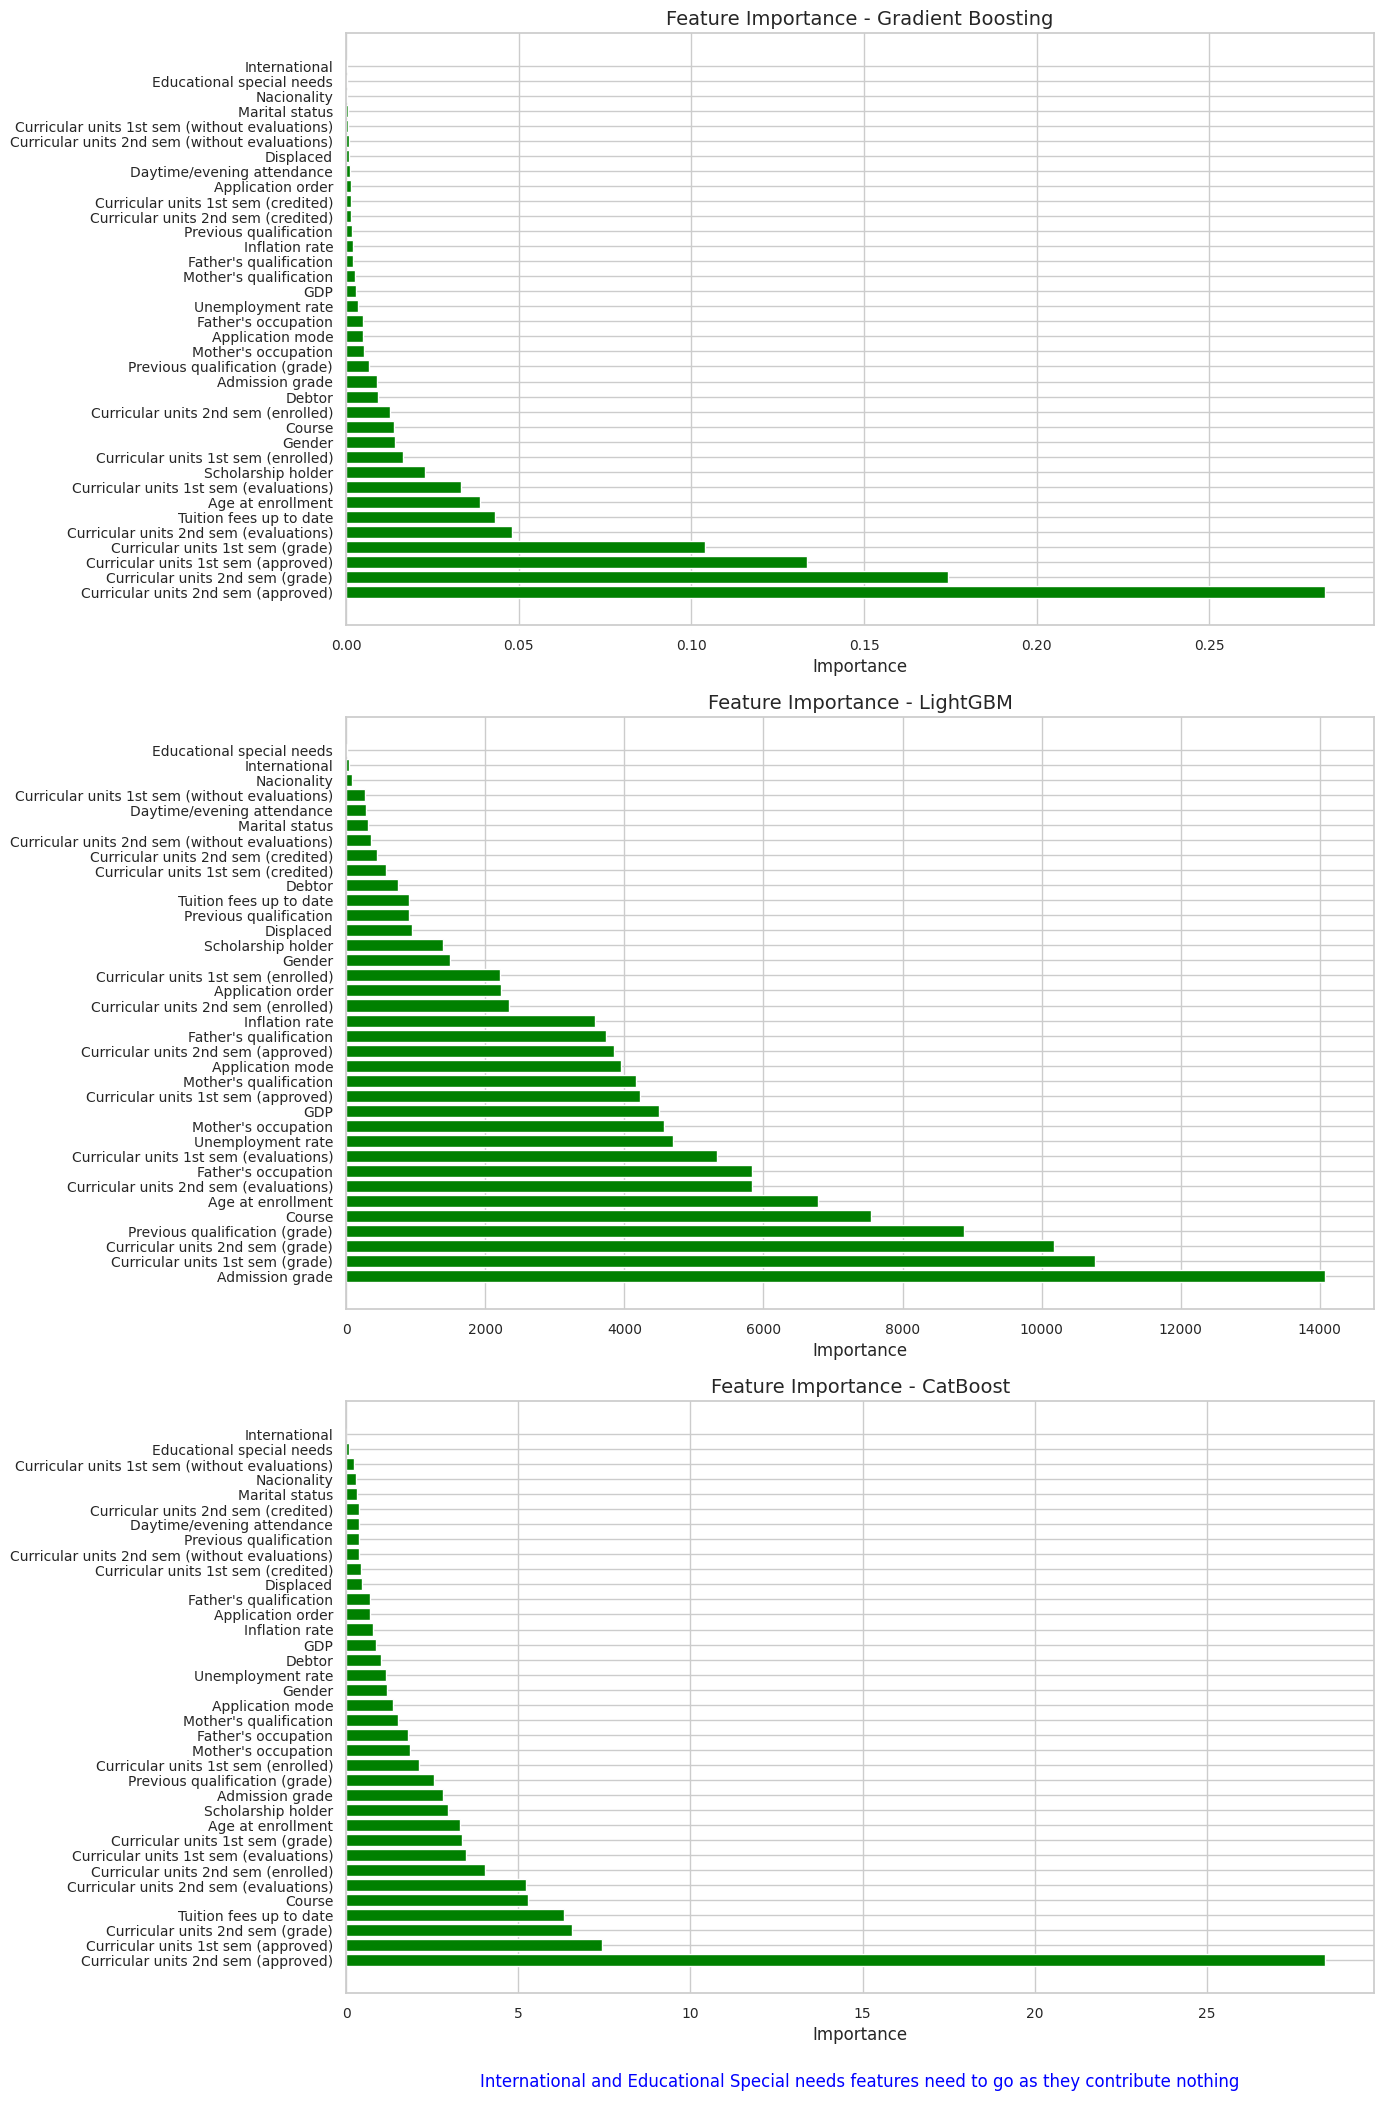

In [28]:
fig, axes = plt.subplots(len(base_classifiers2), 1, figsize=(14, 7 * len(base_classifiers2)))
features = X.columns.tolist() 
for ax, (_, clf) in zip(axes, stacking_clf.named_estimators_.items()):
    if isinstance(clf, GradientBoostingClassifier):
        importances = clf.feature_importances_
        title = 'Feature Importance - Gradient Boosting'
    elif isinstance(clf, LGBMClassifier):
        importances = clf.feature_importances_
        title = 'Feature Importance - LightGBM'
    elif isinstance(clf, CatBoostClassifier):
        importances = clf.get_feature_importance()
        title = 'Feature Importance - CatBoost'
    else:
        continue

    indices = np.argsort(importances)[::-1]
    sorted_feature_names = [features[i] for i in indices]
    ax.barh(sorted_feature_names, importances[indices], align='center', color='green')
    ax.set_title(title, fontsize=14)
    ax.set_xlabel('Importance', fontsize=12)
    ax.tick_params(axis='y', which='major', labelsize=10)  # Adjust y-axis tick font size
    ax.tick_params(axis='x', which='major', labelsize=10)  # Adjust x-axis tick font size
    
axes[-1].text(0.5, -0.15, 'International and Educational Special needs features need to go as they contribute nothing',
              ha='center', va='center', transform=axes[-1].transAxes, fontsize=12, color='blue')
plt.tight_layout()
plt.show()

In [29]:
## import joblib
# joblib.dump(stacking_clf, 'stacking_clf(PSS4E6).joblib')


<h3 style="text-align: center; font-size: 24px; color: #FFFFFF; text-shadow: 2px 2px 5px #000000; background: rgba(0, 0, 0, 1); padding: 10px 20px; border-radius: 15px; box-shadow: 0px 0px 15px rgba(0, 0, 0, 0.5); display: inline-block; margin: 0 auto;">
    TEST PREPROCESSING+PREDICTIONS
</h3>
<div style="position: relative; z-index: -1; text-align: center;">
    <div style="display: inline-block; position: relative; width: 80%; height: 100%; overflow: hidden;">
        <div style="position: absolute; width: 200%; height: 200%; background: repeating-linear-gradient(135deg, #00FF00, #00FF00 10px, #000000 10px, #000000 20px); opacity: 0.7;"></div>
    </div>
</div>


In [30]:
test = pd.read_csv("/kaggle/input/playground-series-s4e6/test.csv")
idx = test['id']
test_new = pd.read_csv("/kaggle/input/playground-series-s4e6/test.csv", index_col=[0])
# test_preds = rf_clf.predict(test)

In [31]:
test_new[continuous_features] = scaler.transform(test_new[continuous_features])

In [32]:
test_preds = stacking_clf.predict(test_new)

In [33]:
test_preds

array(['Dropout', 'Graduate', 'Graduate', ..., 'Dropout', 'Dropout',
       'Dropout'], dtype=object)

In [34]:
submission_df = pd.DataFrame({
    'id':test["id"],
    "Target":test_preds
})

In [35]:
submission_df

,id,Target
0,76518,Dropout
1,76519,Graduate
2,76520,Graduate
3,76521,Graduate
4,76522,Enrolled
...,...,...
51007,127525,Dropout
51008,127526,Dropout
51009,127527,Dropout
51010,127528,Dropout


In [36]:
submission_df.to_csv('submission.csv',index=False)